**<h1 align="center">Sales Forecasting</h1>**
**<h1 align="center">Siemens</h1>**

**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

* [1. Project](#chapter1)
    * [1.1. Imports](#sub-section-1_1)
    * [1.2. Loading Data](#sub-section-1_2)
    * [1.3. Sales Data](#sub-section-1_3)
        * [1.3.1. Initial Analysis](#sub-section-1_3_1)



        
        * [1.3.2. Missing Values](#sub-section-1_3_2)
        * [1.3.3. Duplicates](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)
    * [1.4. Individual Variable Analysis](#sub-section-1_4)
        * [1.4.1. Numerical Variables](#sub-section-1_4_1)
            * [1.4.1.1. Overview](#sub-section-1_4_1_1)
        * [1.4.2. Categorical Variables](#sub-section-1_4_2)
        * [1.4.3. Binary Variables](#sub-section-1_4_3)


        * [1.3.1. Types](#sub-section-1_3_1)
        * [1.3.2. Missing Values](#sub-section-1_3_2)
        * [1.3.3. Duplicates](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)

<a class="anchor" id="chapter1"></a>

# 1. Project Setup

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [61]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Force normal decimal formatting
pd.options.display.float_format = '{:.4f}'.format

In [62]:
# Visualisations 
sns.set_style("white")
siemens_green = '#009999'
siemens_colors = ['#009999', '#006666', '#00CCCC']

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Loading Data

</a>

In [63]:
# Import xlsx dataset into pandas dataframe
market_data = pd.read_excel('../Data/Case2_Market data.xlsx', header=[0,1,2])

# Import csv dataset into pandas dataframe
sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=";")

<a class="anchor" id="chapter2"></a>

# 2. Data Exploration

</a>

<a class="anchor" id="sub-section-2_1"></a>

## 2.1. Sales Data

</a>

<a class="anchor" id="sub-section-2_1_1"></a>

### 2.1.1. Initial Analysis

</a>

In [64]:
print(f'Sales data shape: {sales_data.shape}')
sales_data.sample(5)

Sales data shape: (9802, 3)


DATE Mapped_GCK Sales_EUR
7578  16.12.2021        #12         0
1825  20.10.2020         #6         0
6745  09.10.2021         #1         0
992   04.08.2020         #3         0
170   06.05.2021        #13         0

In [65]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


Before using this dataset effectively, the variables need to be adjusted to the correct data types. 
- DATE to date data type
- Mapped_GCK leave as?
- Sales_EUR to float

In [66]:
# DUPLICATES
sales_data[sales_data.duplicated() == True]

Empty DataFrame
Columns: [DATE, Mapped_GCK, Sales_EUR]
Index: []

In [67]:
# MISSING VALUES
missing_values = sales_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [68]:
# STATISTICS
sales_data.describe(include='all')

DATE Mapped_GCK Sales_EUR
count         9802       9802      9802
unique        1216         14      2609
top     16.04.2021         #1         0
freq            14       1179      7134

<a class="anchor" id="sub-section-2_1_2"></a>

### 2.1.2. Converting Data Types

</a>

In [69]:
# Turn into string, replace commas with periods, and remove leading/trailing whitespaces
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].astype(str).str.replace(',', '.').str.strip()

# Convert to float
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'])

In [70]:
# Convert the DATE column to datetime
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'], format='%d.%m.%Y')

In [71]:
# CHECK
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.9+ KB


<a class="anchor" id="sub-section-2_1_3"></a>

### 2.1.3. Sales Frequency

</a>

Although the term "sales volume" might suggest actual sales figures, in this dataset it might refer to the frequency of product appearances, not the number of units sold.
- The dataset contains 14 unique products.
- Product #1 appears most frequently, with 1,179 occurrences in the dataset.

In [72]:
print(f'Unique values in Mapped_GCK: {sales_data["Mapped_GCK"].nunique()}')

Unique values in Mapped_GCK: 14


In [73]:
# Check the distribution of the products by sales volume
sales_data['Mapped_GCK'].value_counts().sort_values(ascending=False)

Mapped_GCK
#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: count, dtype: int64

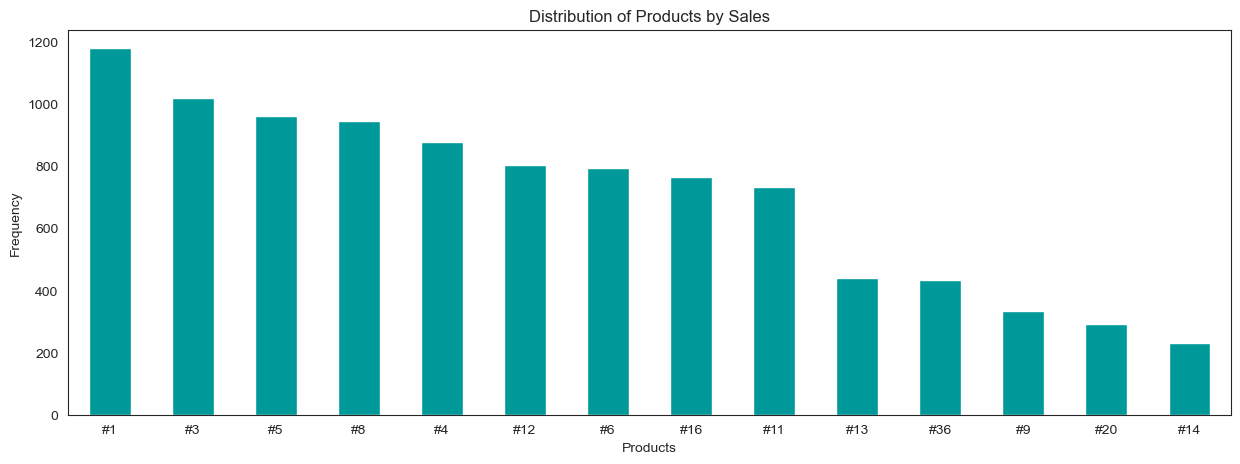

In [74]:
# Plot the distribution of the products by sales volume
plt.figure(figsize=(15, 5))
sales_data['Mapped_GCK'].value_counts().plot(kind='bar', color=siemens_green)
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.title('Distribution of Products by Sales')
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="sub-section-2_1_4"></a>

### 2.1.4. Sales Revenue

</a>

- The total revenue is 2673845300.67 EUR.
- The dataset is highly imbalanced in terms of sales, with the top 3 products accounting for 93.77% of the total revenue.
- There are 276 cases of negative sales.

In [75]:
# Check total revenue per product
rev_product = sales_data.groupby('Mapped_GCK')['Sales_EUR'].sum()
rev_product.sort_values(ascending=False)

Mapped_GCK
#1    1544205996.7600
#3     533443487.7000
#5     429595158.0100
#11     65901314.6500
#8      34871219.8200
#6      20641890.4900
#16     18391175.7100
#4      15627204.9600
#12      8279486.3200
#13      1009156.9100
#36       998613.9100
#14       493822.0600
#9        308446.5100
#20        78326.8600
Name: Sales_EUR, dtype: float64

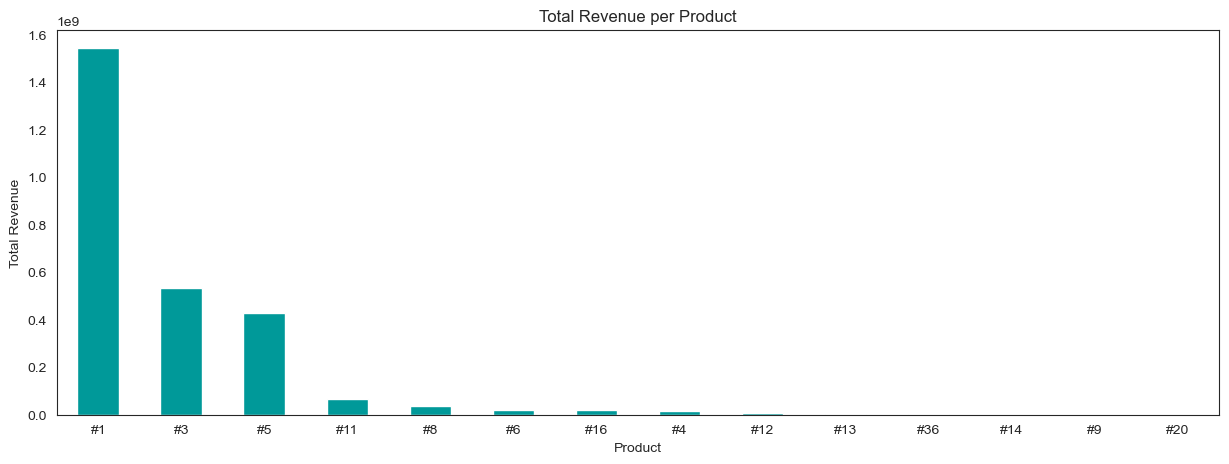

In [76]:
# Make a bar plot of total revenue per product
plt.figure(figsize=(15, 5))
rev_product.sort_values(ascending=False).plot(kind='bar', color=siemens_green)
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product')
plt.xticks(rotation=0)
plt.show()

In [77]:
# Verify what is the percetange of the total revenue generated by the top 3 products
top3_revenue = sales_data.groupby('Mapped_GCK')['Sales_EUR'].sum().sort_values(ascending=False).head(3).sum()
total_revenue = sales_data['Sales_EUR'].sum()
top3_revenue_percent = (top3_revenue / total_revenue) * 100
print(f'The total revenue is {total_revenue:.2f} EUR.')
print(f'The top 3 products account for {top3_revenue_percent:.2f}% of the total revenue.')

The total revenue is 2673845300.67 EUR.
The top 3 products account for 93.77% of the total revenue.


In [78]:
# Check negative values
print(f'There are {len(sales_data[sales_data["Sales_EUR"] < 0])} cases of negative sales.')

There are 276 cases of negative sales.


<a class="anchor" id="sub-section-2_1_5"></a>

### 2.1.5. Seasonality

</a>

In [79]:
print('Oldest date in Sales Data:', sales_data['DATE'].min())
print('Newest date in Sales Data:', sales_data['DATE'].max())

Oldest date in Sales Data: 2018-10-01 00:00:00
Newest date in Sales Data: 2022-04-30 00:00:00


In [80]:
# Add columns for Month and Year
sales_data['Month'] = sales_data['DATE'].dt.month
sales_data['Year'] = sales_data['DATE'].dt.year

The data points to notable month-to-month and year-to-year fluctuations in both sales frequency and revenue. In terms of monthly performance, **March records the highest number of sales at 969**, generating 264,695,388.51 EUR in revenue, while **May sees the lowest sales frequency at 666**, bringing in 181,965,399.97 EUR. On average, monthly sales frequency stands at 816.83, with mean monthly revenue at 222,820,441.72 EUR.

Annually, **2020 leads in overall sales frequency** at 2,779, whereas **2021 posts the highest revenue** at 773,208,458.97 EUR. In contrast, 2018 lags behind with the fewest total sales (639) and the smallest revenue (141,544,018.09 EUR). Across all years, the average annual revenue is 534,769,060.13 EUR.

These patterns underline the importance of monitoring demand cycles—both seasonally and annually—to inform production planning, inventory management, and overall business strategy.

<a class="anchor" id="sub-section-2_1_5_1"></a>

#### 2.1.5.1. Sales Frequency

</a>

***Frequency of sales by month***
- Sales drop during summer
- Highest frequency month: 3 with 969 sales
- Lowest frequency month: 5 with 666 sales
- Average frequency of sales per month: 816.83

In [81]:
# Check the sales distribution per month
sales_data['Month'].value_counts()

Month
3     969
10    932
11    925
1     900
2     872
4     859
12    823
9     740
7     733
6     693
8     690
5     666
Name: count, dtype: int64

In [82]:
print(f'The month with the highest frequency of sales is {sales_data["Month"].value_counts().idxmax()}, with {sales_data["Month"].value_counts().max()} sales.')
print(f'The month with the lowest frequency of sales is {sales_data["Month"].value_counts().idxmin()}, with {sales_data["Month"].value_counts().min()} sales.')
print(f'The average frequency of sales per month is {sales_data["Month"].value_counts().mean():.2f}.')

The month with the highest frequency of sales is 3, with 969 sales.
The month with the lowest frequency of sales is 5, with 666 sales.
The average frequency of sales per month is 816.83.


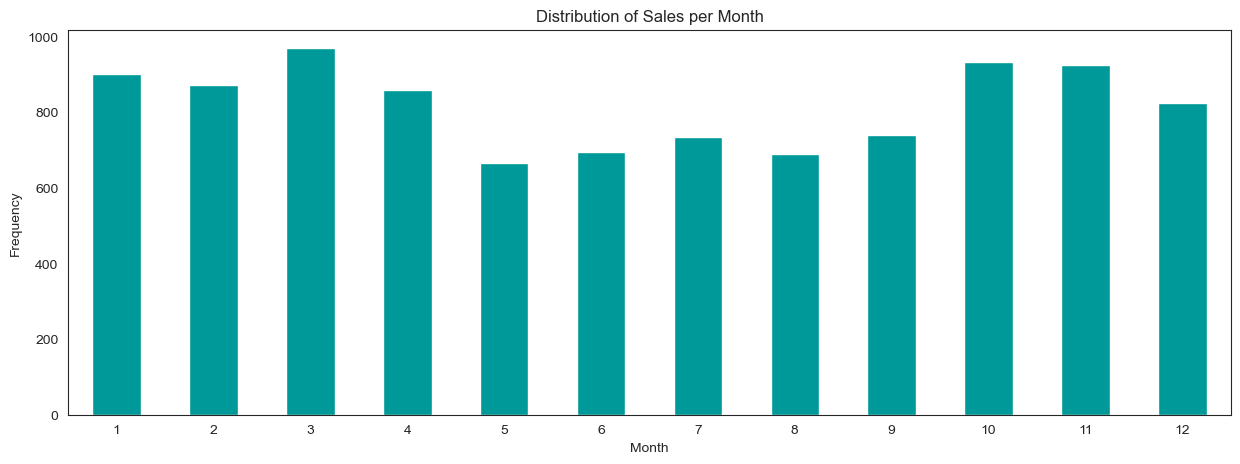

In [83]:
# plot the distribution of the sales per month
plt.figure(figsize=(15, 5))
sales_data['Month'].value_counts().sort_index().plot(kind='bar', color=siemens_green)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Sales per Month')
plt.xticks(rotation=0)
plt.show()

***Frequency of sales by year***
- Highest frequency year: 2020 with 2779 sales
- Lowest frequency year: 2018 with 639 sales (only have 10 months in 2018)
- Average frequency of sales per year: 1960.40

In [84]:
# Check the sales distribution per year
sales_data['Year'].value_counts()

Year
2020    2779
2021    2762
2019    2727
2022     895
2018     639
Name: count, dtype: int64

In [85]:
print(f'The year with the highest frequency of sales is {sales_data["Year"].value_counts().idxmax()}, with {sales_data["Year"].value_counts().max()} sales.')
print(f'The year with the lowest frequency of sales is {sales_data["Year"].value_counts().idxmin()}, with {sales_data["Year"].value_counts().min()} sales.')
print(f'The average frequency of sales per year is {sales_data["Year"].value_counts().mean():.2f}.')

The year with the highest frequency of sales is 2020, with 2779 sales.
The year with the lowest frequency of sales is 2018, with 639 sales.
The average frequency of sales per year is 1960.40.


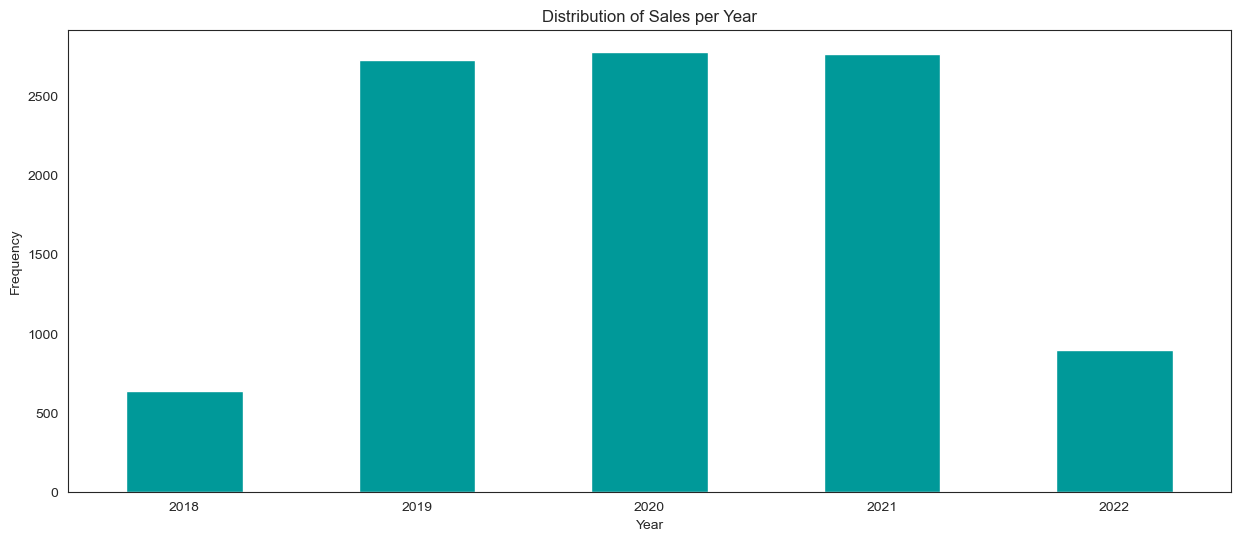

In [86]:
# plot the distribution of the sales per year
plt.figure(figsize=(15, 6))
sales_data['Year'].value_counts().sort_index().plot(kind='bar', color=siemens_green)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Sales per Year')
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="sub-section-2_1_5_2"></a>

#### 2.1.5.2. Sales Revenue

</a>

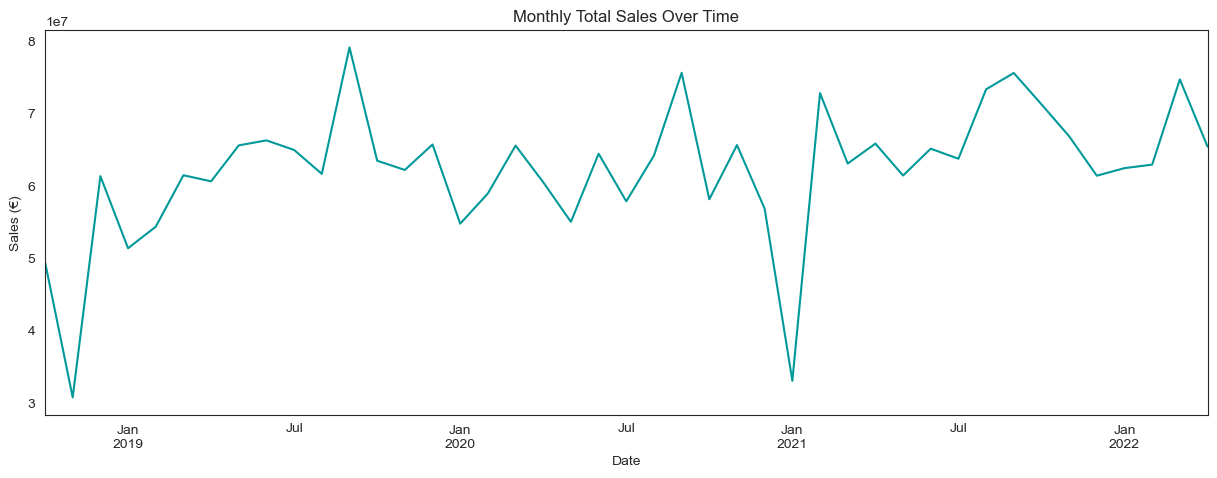

In [87]:
# Set index to date for graphs
monthly_sales = sales_data.set_index('DATE').resample('ME')['Sales_EUR'].sum()

monthly_sales.plot(figsize=(15,5), color=siemens_green)
plt.title('Monthly Total Sales Over Time')
plt.ylabel('Sales (€)')
plt.xlabel('Date')
plt.show()

- No consistent upward or downward trend across the full period.
- Cyclical or seasonal fluctuations, with sales repeatedly rising and falling.
- Sharp dips in late 2018 and early 2021.

***Seasonal decomposition*** is a time series analysis technique that breaks down a series into its trend, seasonal, and residual components to better understand underlying patterns.

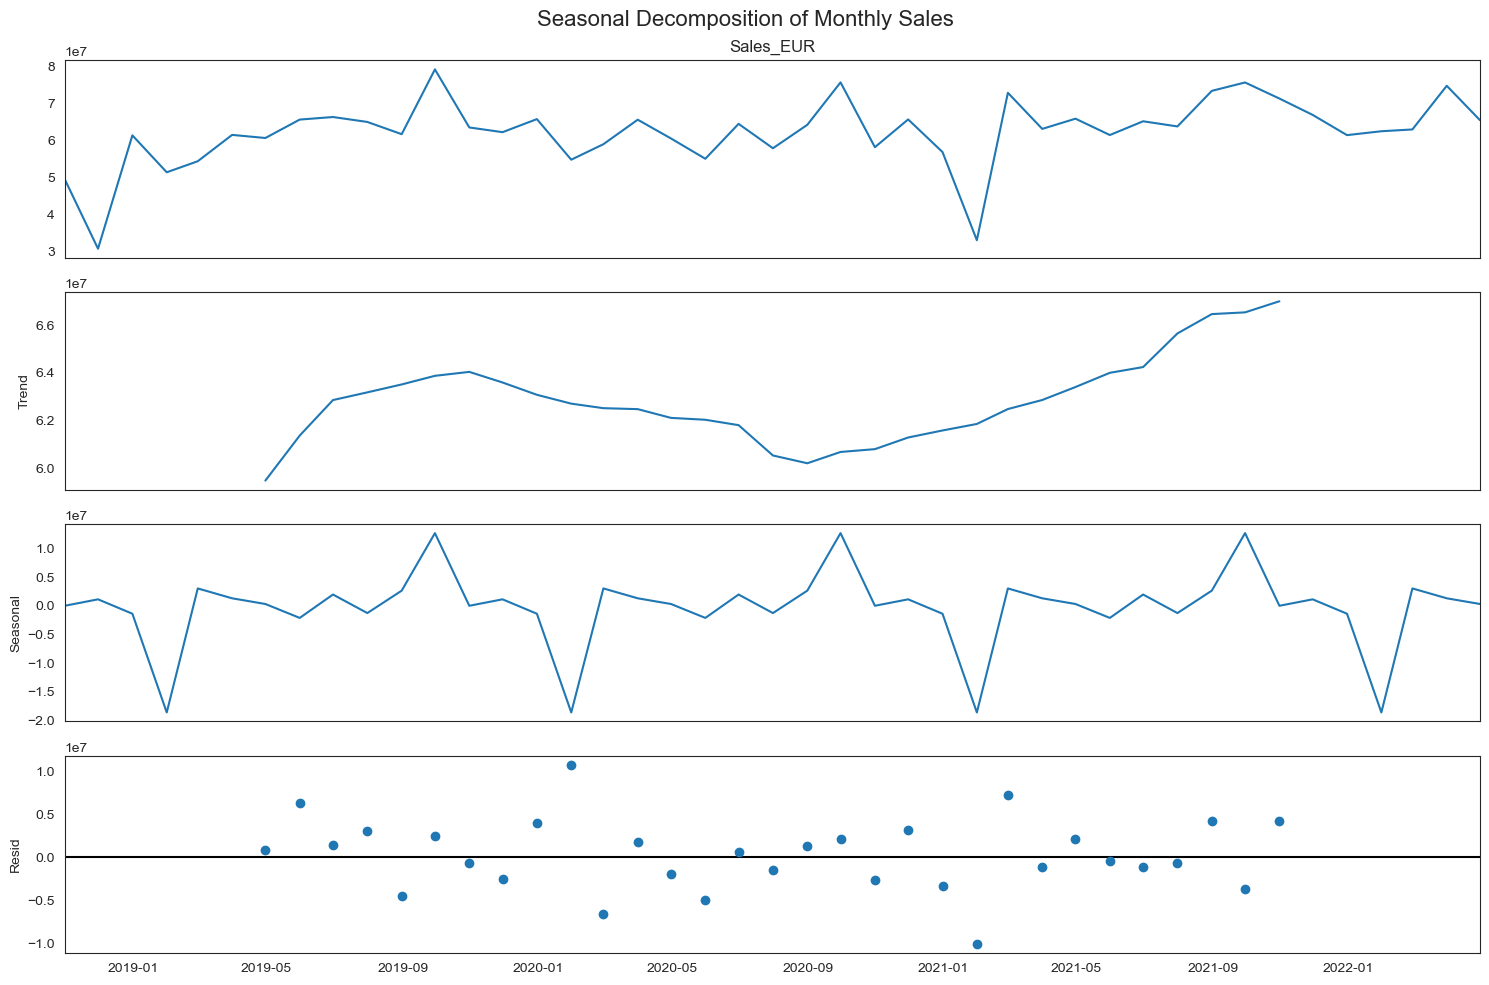

In [88]:
# Set DATE as index to use resample
monthly_sales = sales_data.set_index('DATE')

# Now resample by month-end
monthly_sales = monthly_sales['Sales_EUR'].resample('ME').sum()

decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

- Trend: long-term direction of sales, smoothed out.
    - A gradual upward trend from 2018 to 2019.
    - A slight dip in early 2020 - Covid-19?
    - A recovery and stronger trend in 2021 and early 2022.
- Seasonal: isolates recurring monthly effects that repeat every year.
    - January-February have sales drop, while July-September have sales boost
- Resid: noise or what's left over after removing trend + seasonality.

***Revenue by month***
- Revenue drops during summer.
- Highest revenue month: 3 with 264695388.51 EUR
- Lowest revenue month: 5 with 181965399.97 EUR
- Average revenue per month: 222820441.72 EUR

In [89]:
# check the revenue distribution per month
sales_data.groupby('Month')['Sales_EUR'].sum()

Month
1    201590801.0700
2    248945553.3100
3    264695388.5100
4    252267661.8200
5    181965399.9700
6    195766009.8500
7    186480261.1500
8    199085856.7600
9    230235562.0500
10   242265376.9900
11   225357428.5400
12   245190000.6500
Name: Sales_EUR, dtype: float64

In [90]:
print(f'The month with the highest revenue is {sales_data.groupby("Month")["Sales_EUR"].sum().idxmax()}, with {sales_data.groupby("Month")["Sales_EUR"].sum().max():.2f} EUR.')
print(f'The month with the lowest revenue is {sales_data.groupby("Month")["Sales_EUR"].sum().idxmin()}, with {sales_data.groupby("Month")["Sales_EUR"].sum().min():.2f} EUR.')
print(f'The average revenue per month is {sales_data.groupby("Month")["Sales_EUR"].sum().mean():.2f} EUR.')

The month with the highest revenue is 3, with 264695388.51 EUR.
The month with the lowest revenue is 5, with 181965399.97 EUR.
The average revenue per month is 222820441.72 EUR.


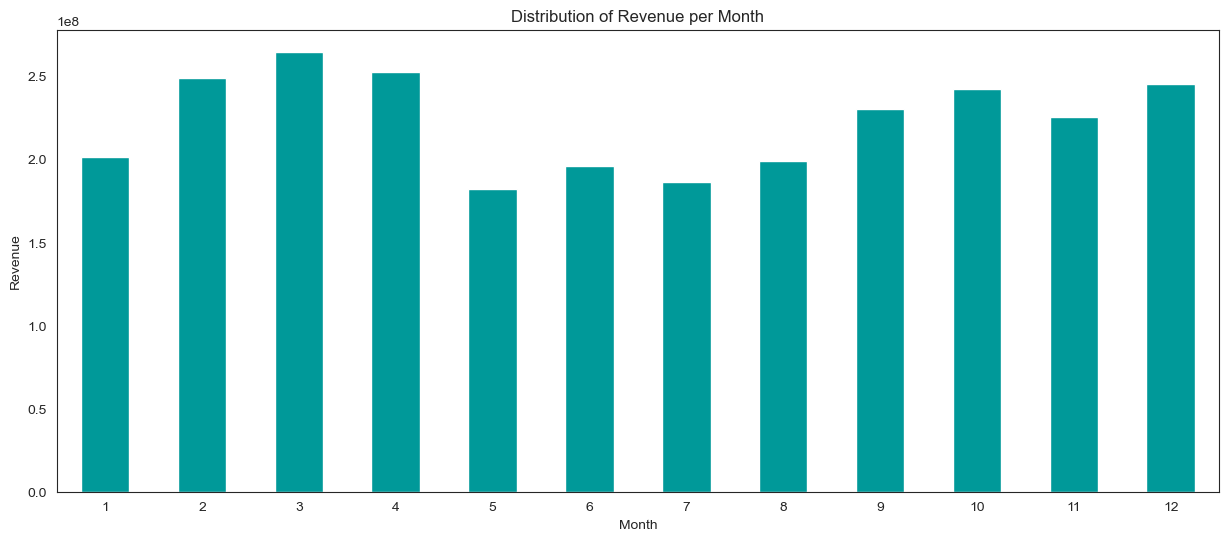

In [91]:
# plot the distribution of the revenue per month
plt.figure(figsize=(15, 6))
sales_data.groupby('Month')['Sales_EUR'].sum().plot(kind='bar', color=siemens_green)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue per Month')
plt.xticks(rotation=0)
plt.show()

***Revenue by year***
- Highest revenue year: 2021 with 773208458.97 EUR
- Lowest revenue year: 2018 with 141544018.09 EUR (only have 10 months in 2018)
- Average revenue per year is 534769060.13 EUR

In [92]:
# check the revenue distribution per year
sales_data.groupby('Year')['Sales_EUR'].sum()

Year
2018   141544018.0900
2019   756488260.5600
2020   737218879.3500
2021   773208458.9700
2022   265385683.7000
Name: Sales_EUR, dtype: float64

In [93]:
print(f'The year with the highest revenue is {sales_data.groupby("Year")["Sales_EUR"].sum().idxmax()}, with {sales_data.groupby("Year")["Sales_EUR"].sum().max():.2f} EUR.')
print(f'The year with the lowest revenue is {sales_data.groupby("Year")["Sales_EUR"].sum().idxmin()}, with {sales_data.groupby("Year")["Sales_EUR"].sum().min():.2f} EUR.')
print(f'The average revenue per year is {sales_data.groupby("Year")["Sales_EUR"].sum().mean():.2f} EUR.')

The year with the highest revenue is 2021, with 773208458.97 EUR.
The year with the lowest revenue is 2018, with 141544018.09 EUR.
The average revenue per year is 534769060.13 EUR.


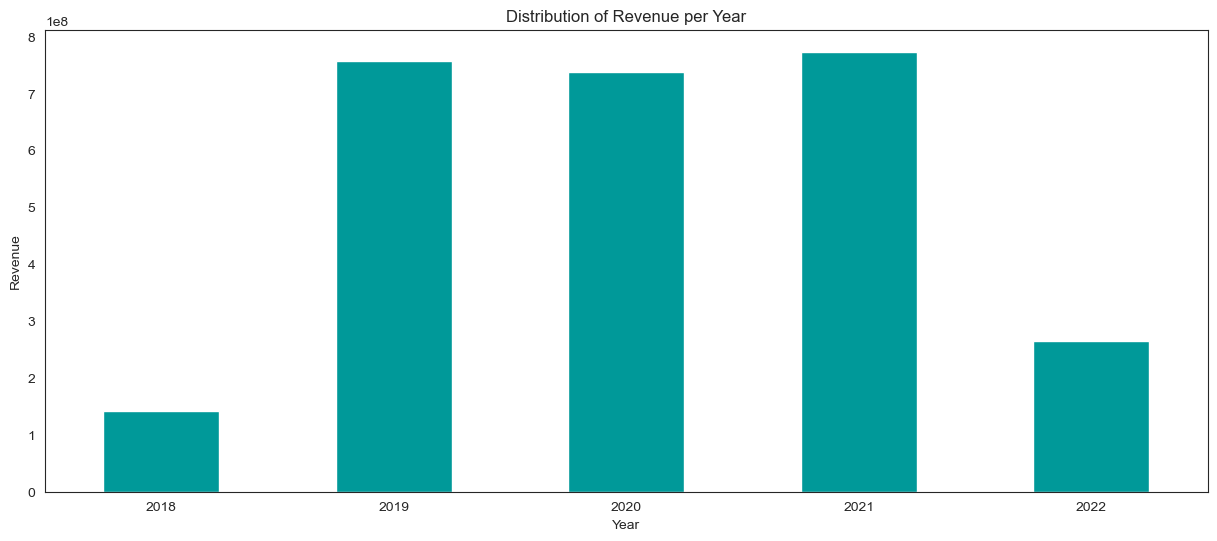

In [94]:
# plot the distribution of the revenue per year
plt.figure(figsize=(15, 6))
sales_data.groupby('Year')['Sales_EUR'].sum().plot(kind='bar', color=siemens_green)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue per Year')
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="sub-section-2_1_5_3"></a>

#### 2.1.5.3. Sales Revenue by Product

</a>

In [95]:
# Set DATE as datetime index
monthly_sales = sales_data.set_index('DATE')

# Resample to month-end and sum Sales_EUR per product category
monthly_sales = (monthly_sales.groupby('Mapped_GCK', observed=False)['Sales_EUR'].resample('ME').sum().unstack(level=0).fillna(0))

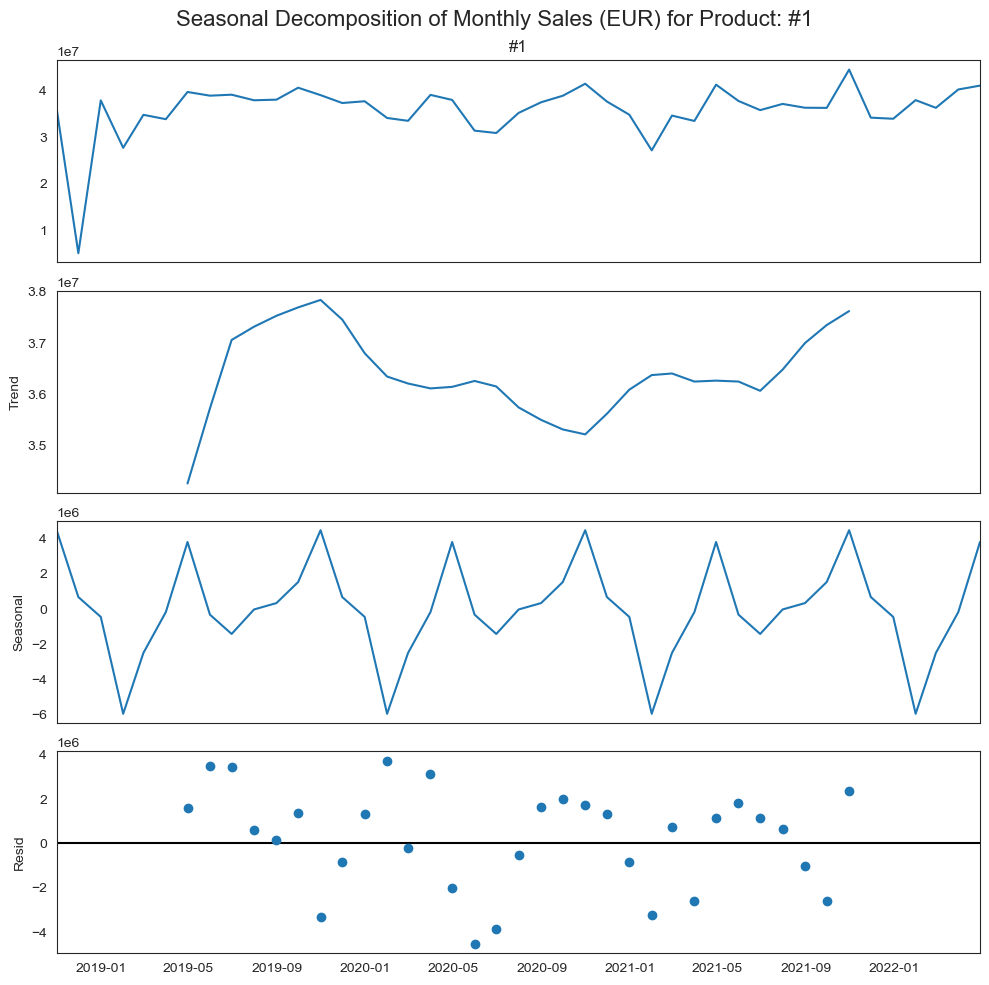

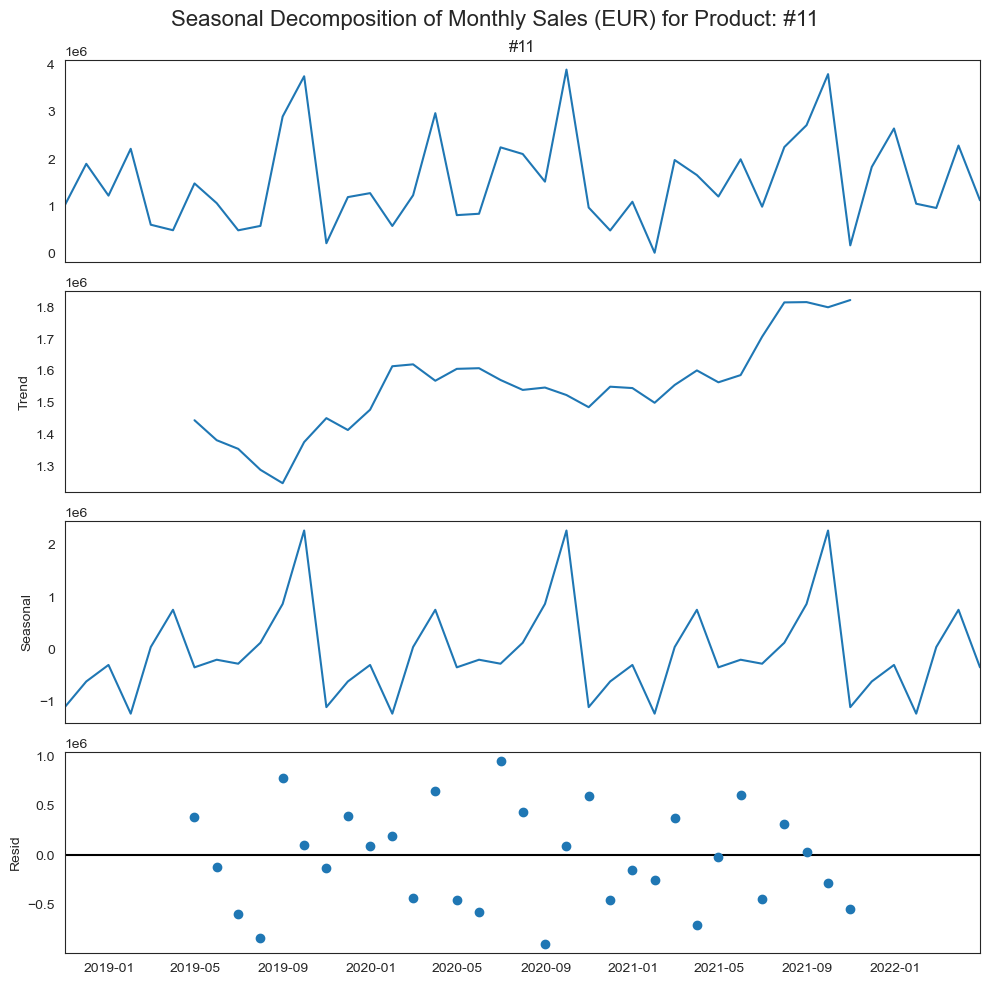

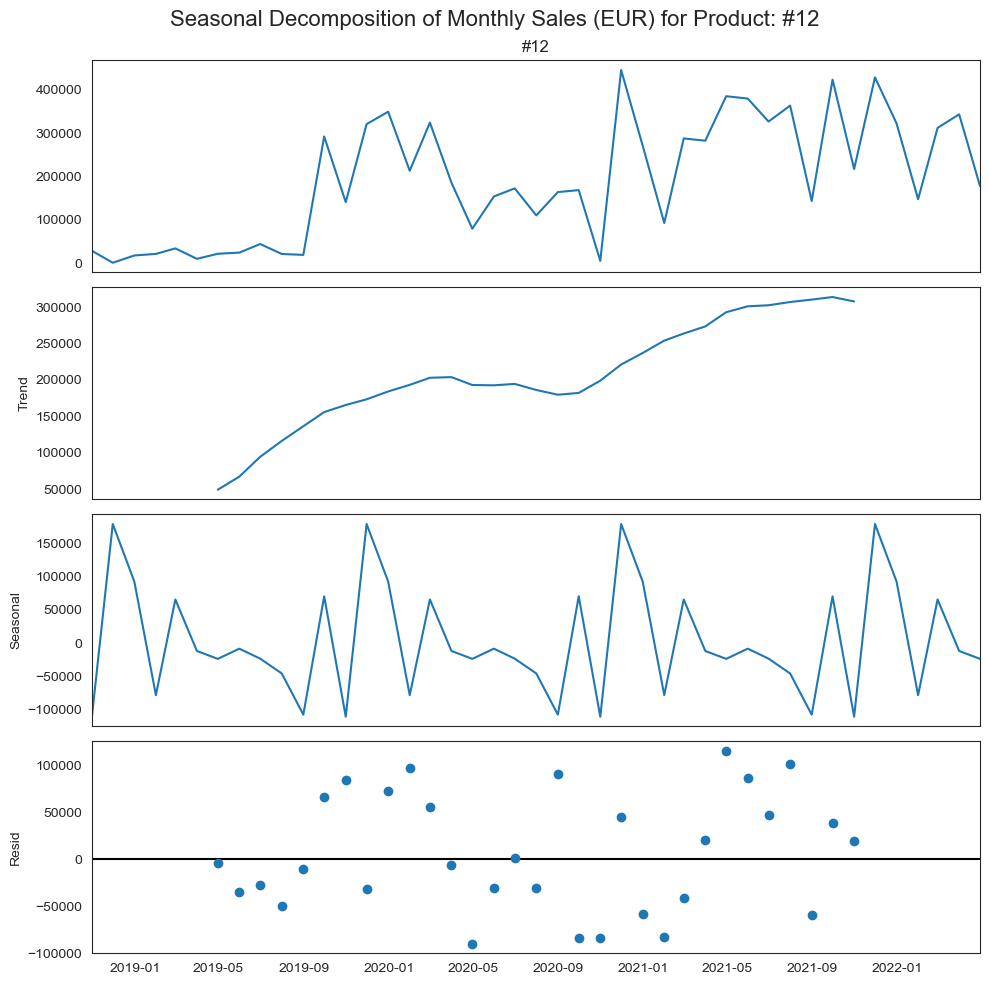

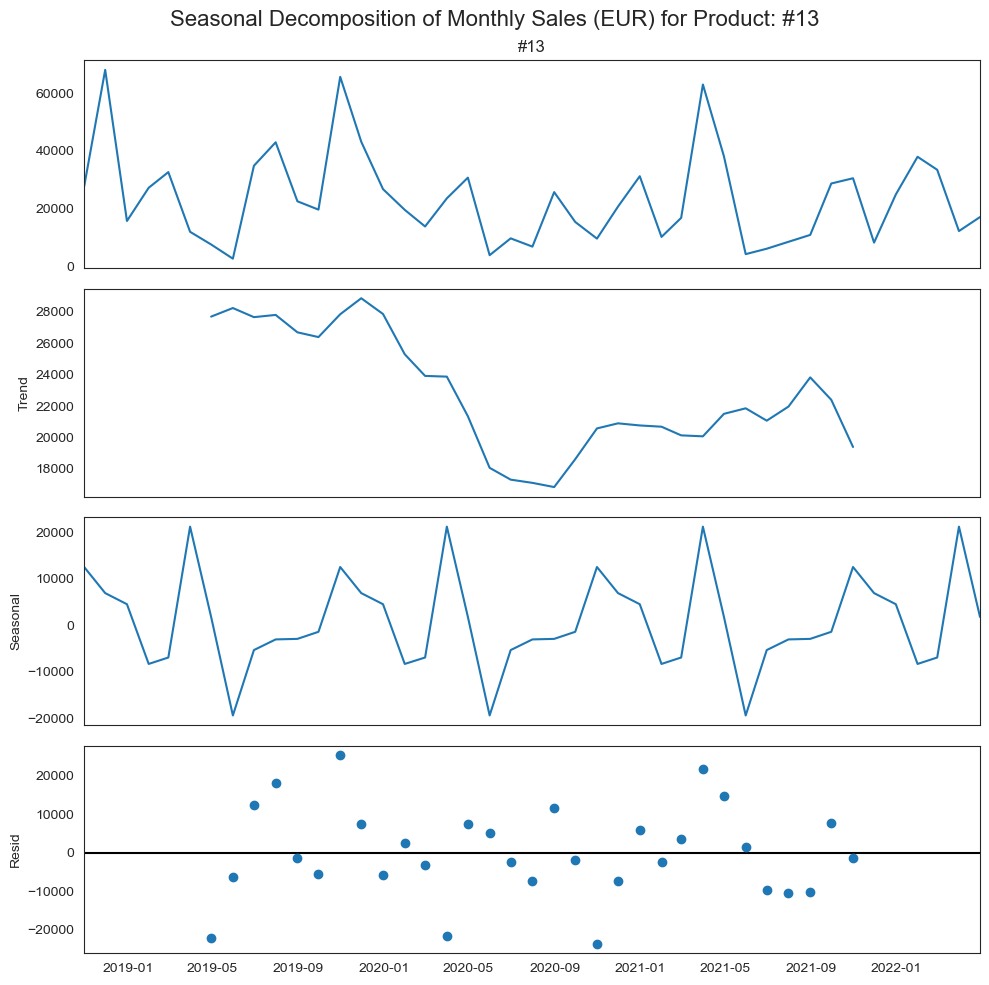

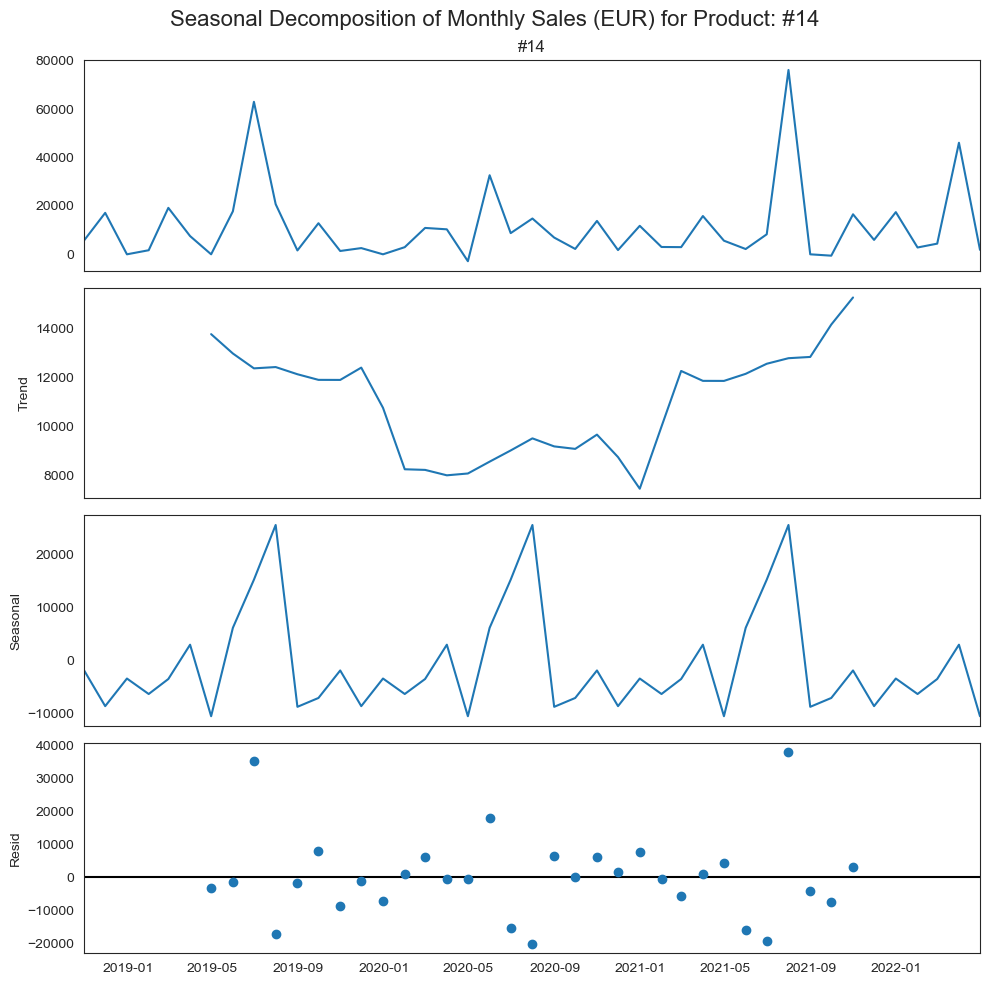

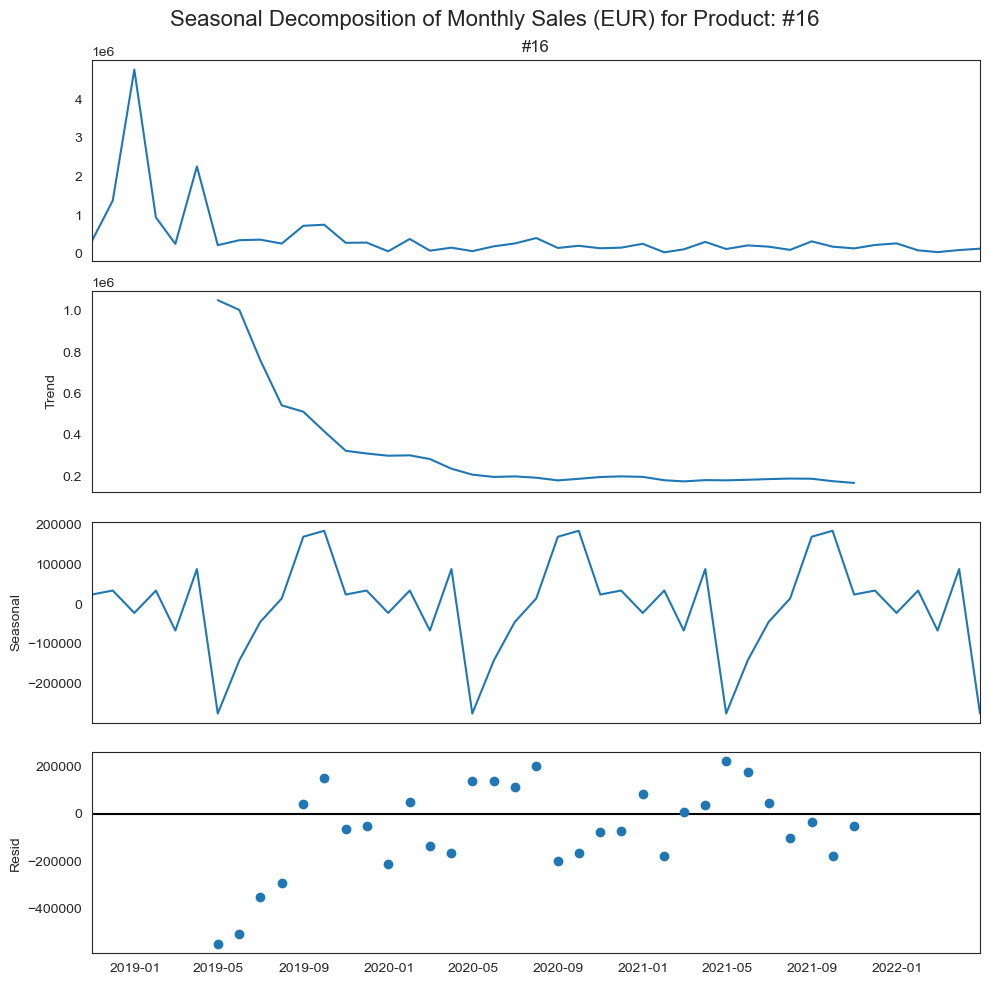

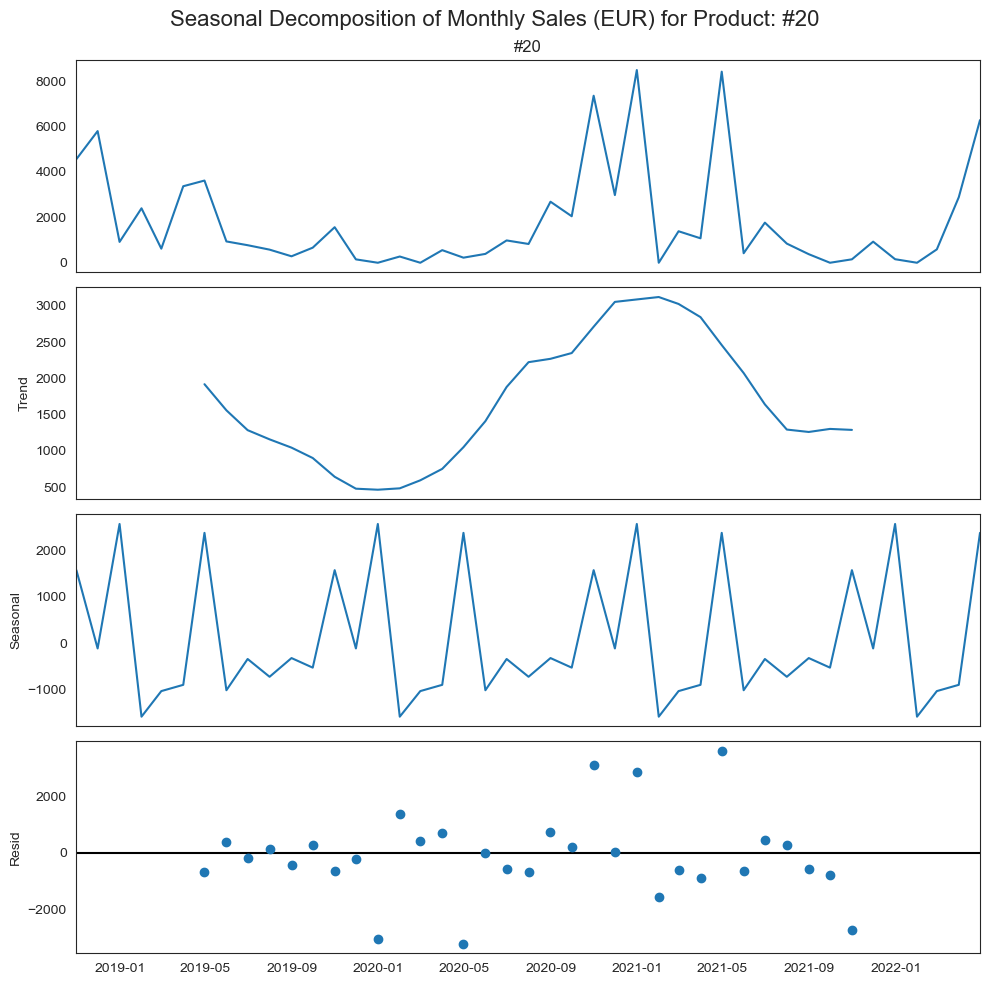

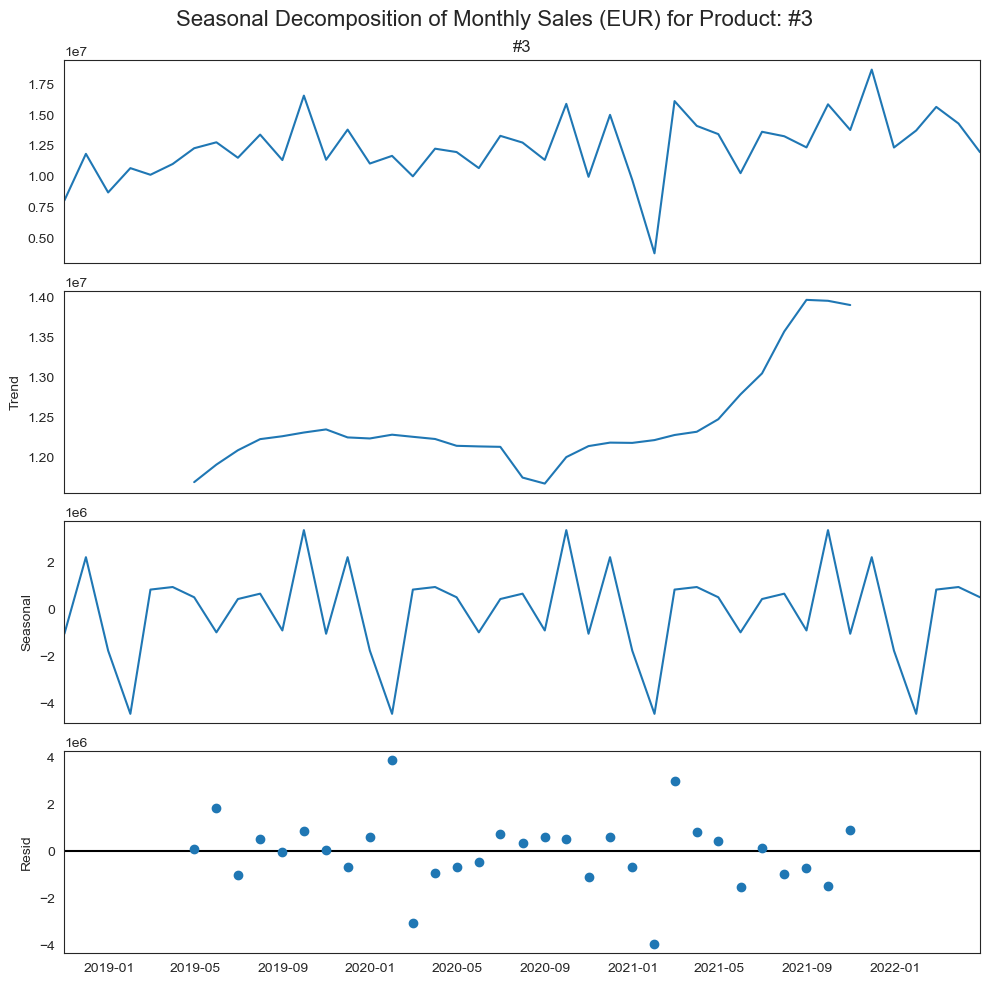

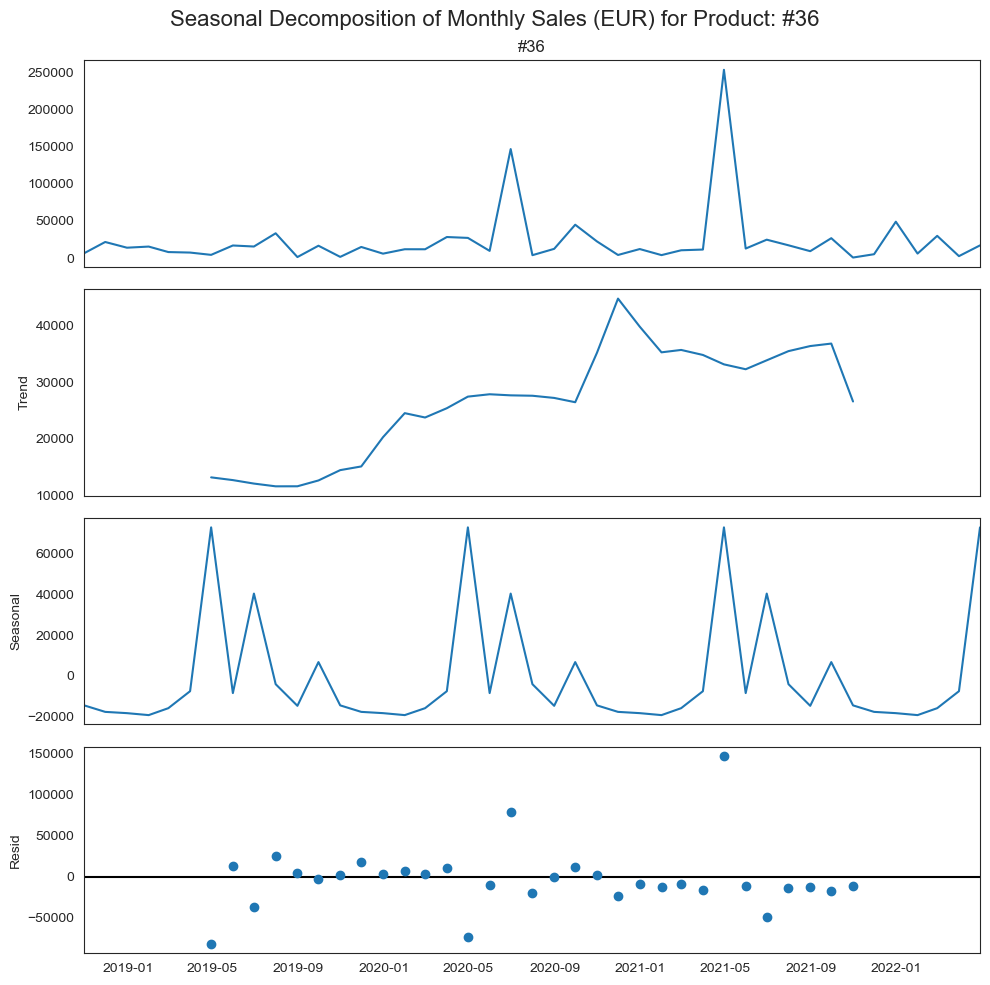

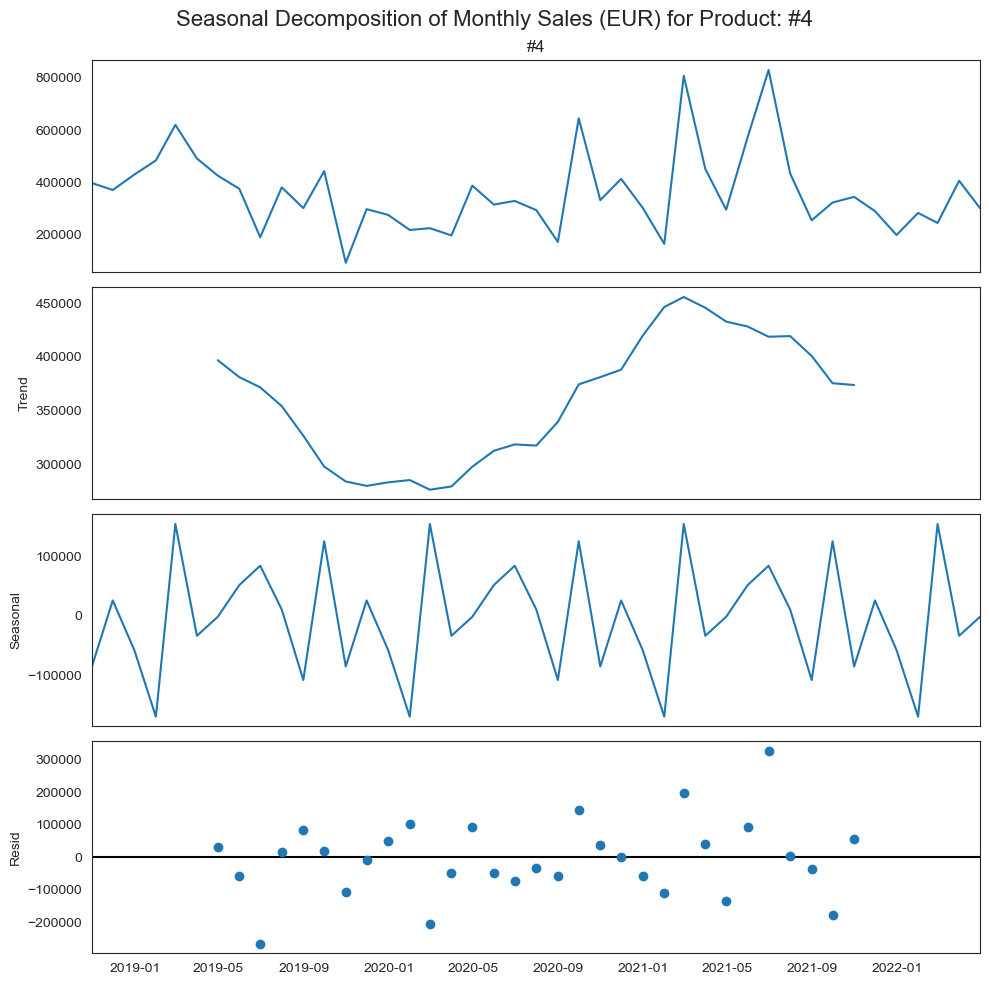

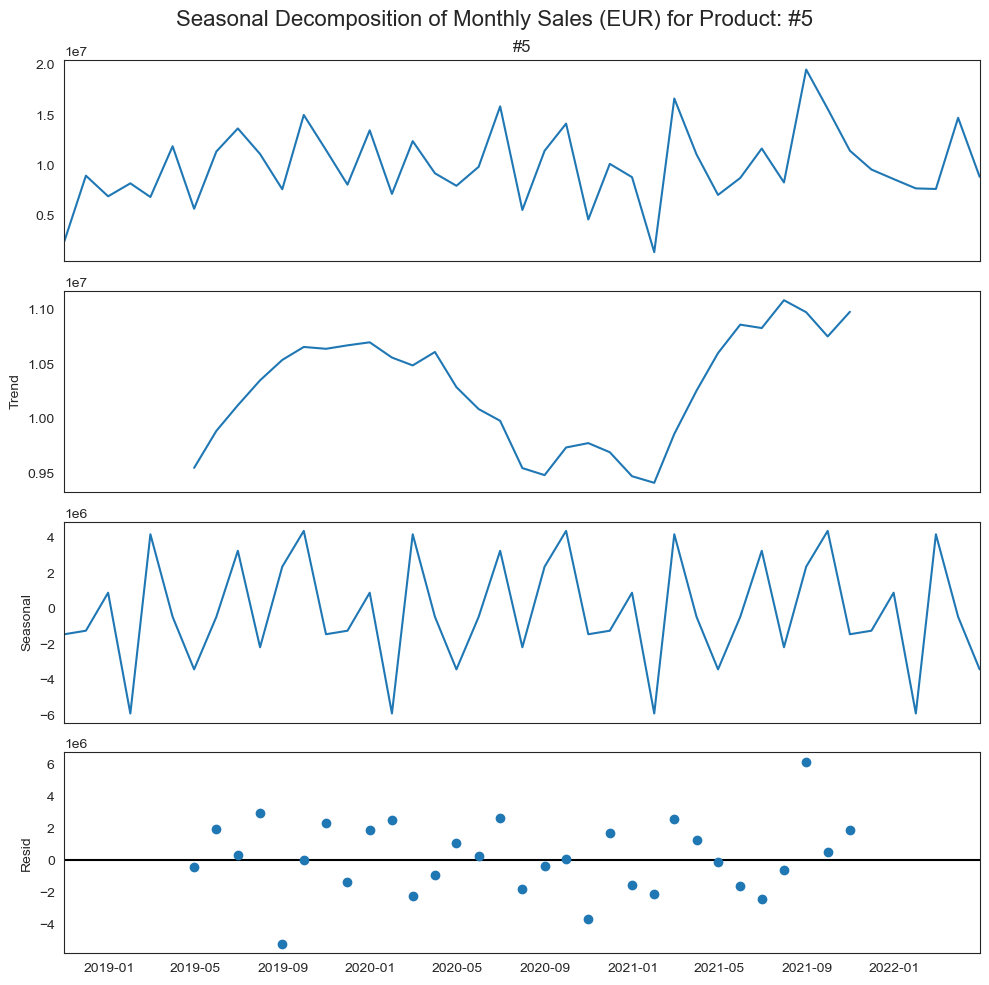

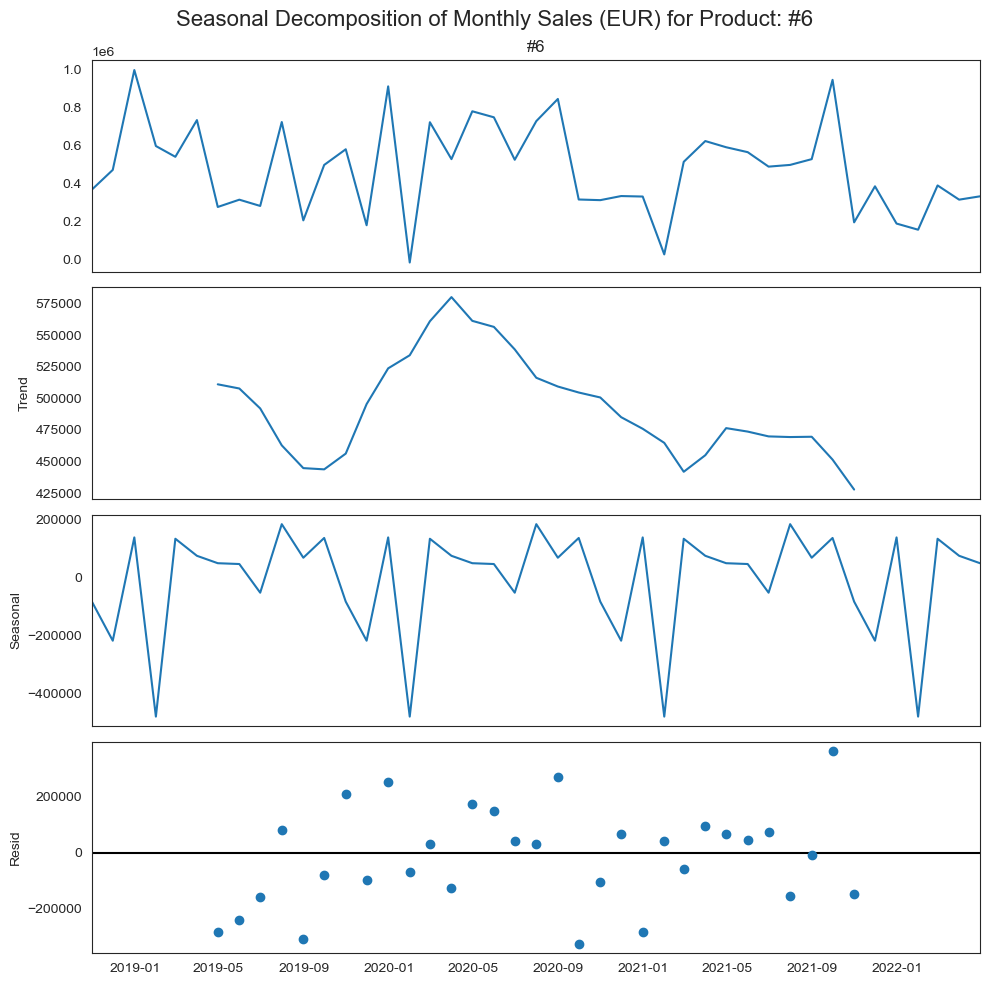

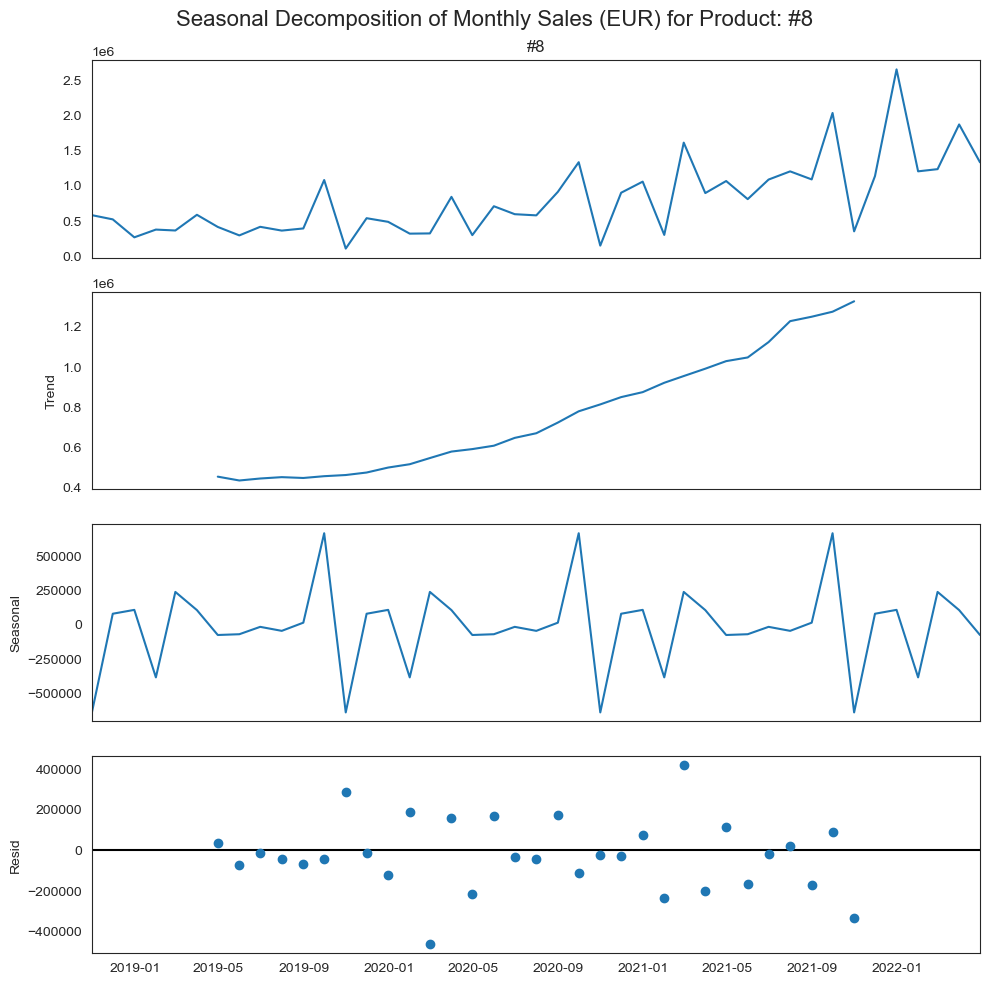

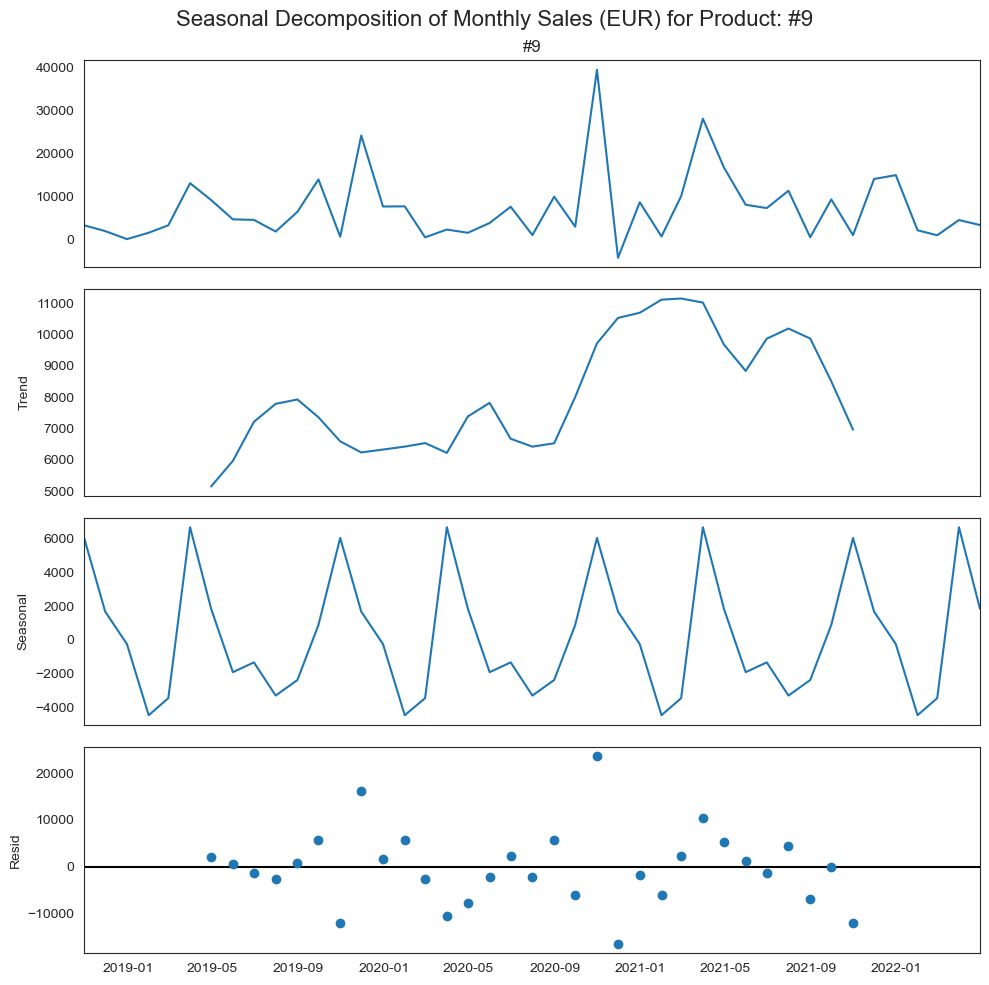

In [147]:
for product_category in monthly_sales.columns:
    sales_series = monthly_sales[product_category]

    decomposition = seasonal_decompose(sales_series, model='additive', period=12)

    # Plot
    fig = decomposition.plot()
    fig.set_size_inches(10, 10)
    plt.suptitle(f'Seasonal Decomposition of Monthly Sales (EUR) for Product: {product_category}', fontsize=16)
    plt.tight_layout()
    plt.show()

***General Observations***
- Generally, we can observe a dip in sales revenue in 2020 (Covid-19).
- Major dip in 2020 for product 13, and has not fully recovered.
- Product 16 has been in decline.
- Some increase in revenues for certain products can compensate the decrease in others, as yearly trends remain generally the same.

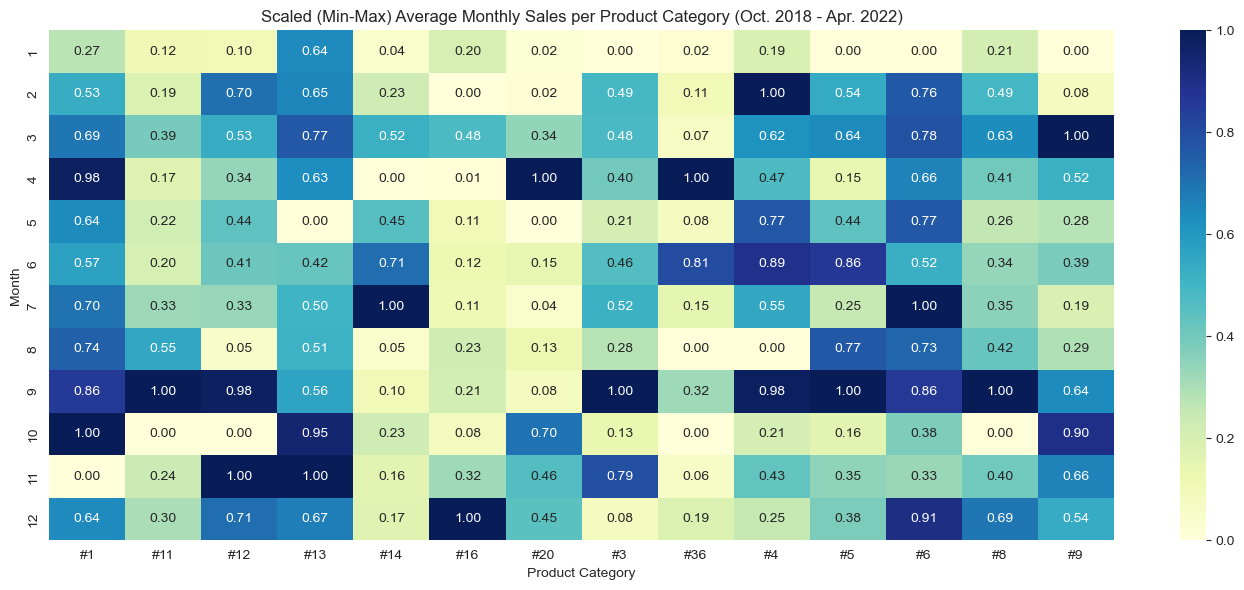

In [97]:
# Aggregate the number of sales per product (Mapped_GCK), per month and year
yearly_monthly_sales = sales_data.groupby(['Year', 'Month', 'Mapped_GCK'], observed=False)['Sales_EUR'].sum().reset_index(name='Sales')

# Average over years, and group by Month and Product
avg_monthly_sales = yearly_monthly_sales.groupby(['Month', 'Mapped_GCK'], observed=False)['Sales'].mean().unstack().fillna(0)

#avg_monthly_sales = avg_monthly_sales.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Scale the data for comparison and have a better understanding of seasonality 
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(avg_monthly_sales), index=avg_monthly_sales.index, columns=avg_monthly_sales.columns)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(scaled_data, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Scaled (Min-Max) Average Monthly Sales per Product Category (Oct. 2018 - Apr. 2022)')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

March appears to be a busy month across many products (esp. #1, #3, #5, #12, #13), except for product #36. September to December also shows stronger performance across multiple products — potentially due to holidays, year-end campaigns, or Q4 push. Summer months (June–August) and start of the year (January) are generally quieter across most products — possible vacation or off-season impact.

***Check the top 3 performing products***

In [98]:
# Top 3 product categories by total revenue
rev_product = sales_data.groupby('Mapped_GCK', observed=False)['Sales_EUR'].sum()
top3_categories = rev_product.sort_values(ascending=False).head(3).index.tolist()

# Filter dataset to top 3 categories
top3_data = sales_data[sales_data['Mapped_GCK'].isin(top3_categories)]
# Set 'date' as the index for resampling
top3_data = top3_data.set_index('DATE')

# Resample by month and group by category for revenue and volume
monthly_revenue = (top3_data.groupby('Mapped_GCK', observed=False)['Sales_EUR'].resample('ME').sum().unstack(level=0).fillna(0))
monthly_volume = (top3_data.groupby('Mapped_GCK', observed=False)['Sales_EUR'].resample('ME').count().unstack(level=0).fillna(0))

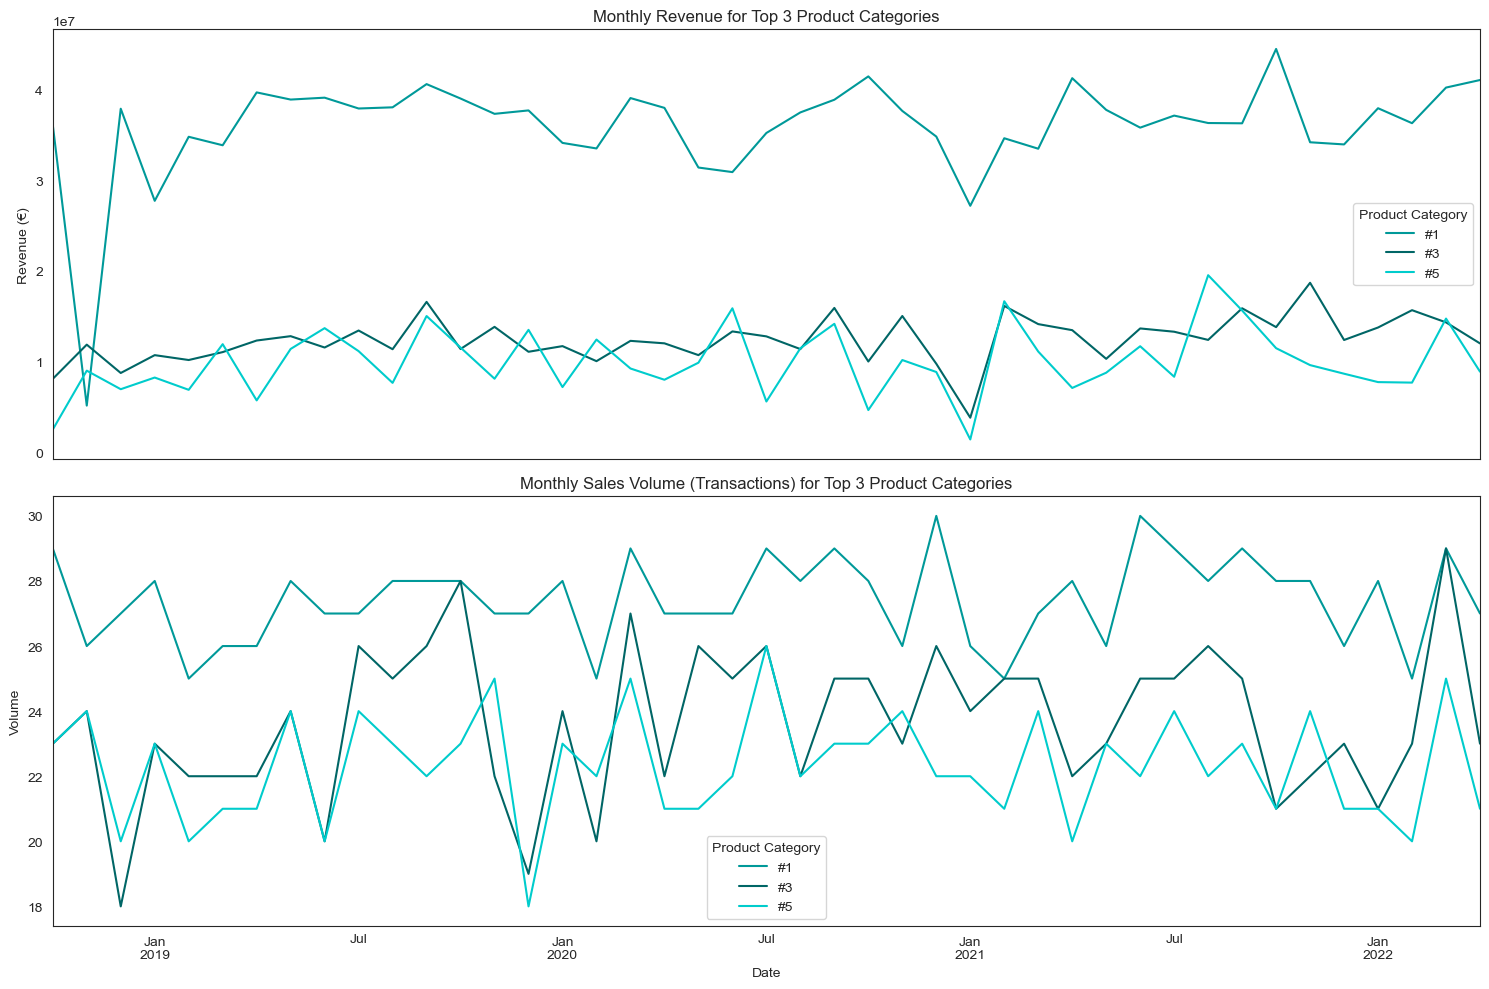

In [99]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Sales plot
monthly_revenue.plot(ax=axs[0], color=siemens_colors)
axs[0].set_title('Monthly Revenue for Top 3 Product Categories')
axs[0].set_ylabel('Revenue (€)')
axs[0].legend(title='Product Category')

# Volume plot
monthly_volume.plot(ax=axs[1], color=siemens_colors)
axs[1].set_title('Monthly Sales Volume (Transactions) for Top 3 Product Categories')
axs[1].set_ylabel('Volume')
axs[1].set_xlabel('Date')
axs[1].legend(title='Product Category')

plt.tight_layout()
plt.show()

- Category #1 is a clear revenue driver. It dominates earnings but not transaction count, implying higher unit prices or larger order sizes.
- Categories #3 and #5 are volume-driven. Their volume is similar to #1, but revenue is lower. This could be lower-priced items.
- There is mismatch between revenue and volume. Use price per unit as a derived feature?
- Seasonality/Trend: there's some seasonality in revenue for Category #1. Volume seems more random — might benefit from smoothing or rolling stats.

<a class="anchor" id="sub-section-2_1_6"></a>

### 2.1.6. Correlation Between Product Categories

</a>

In [100]:
product_columns = [col for col in monthly_sales.columns]
print(product_columns)

['#1', '#11', '#12', '#13', '#14', '#16', '#20', '#3', '#36', '#4', '#5', '#6', '#8', '#9']


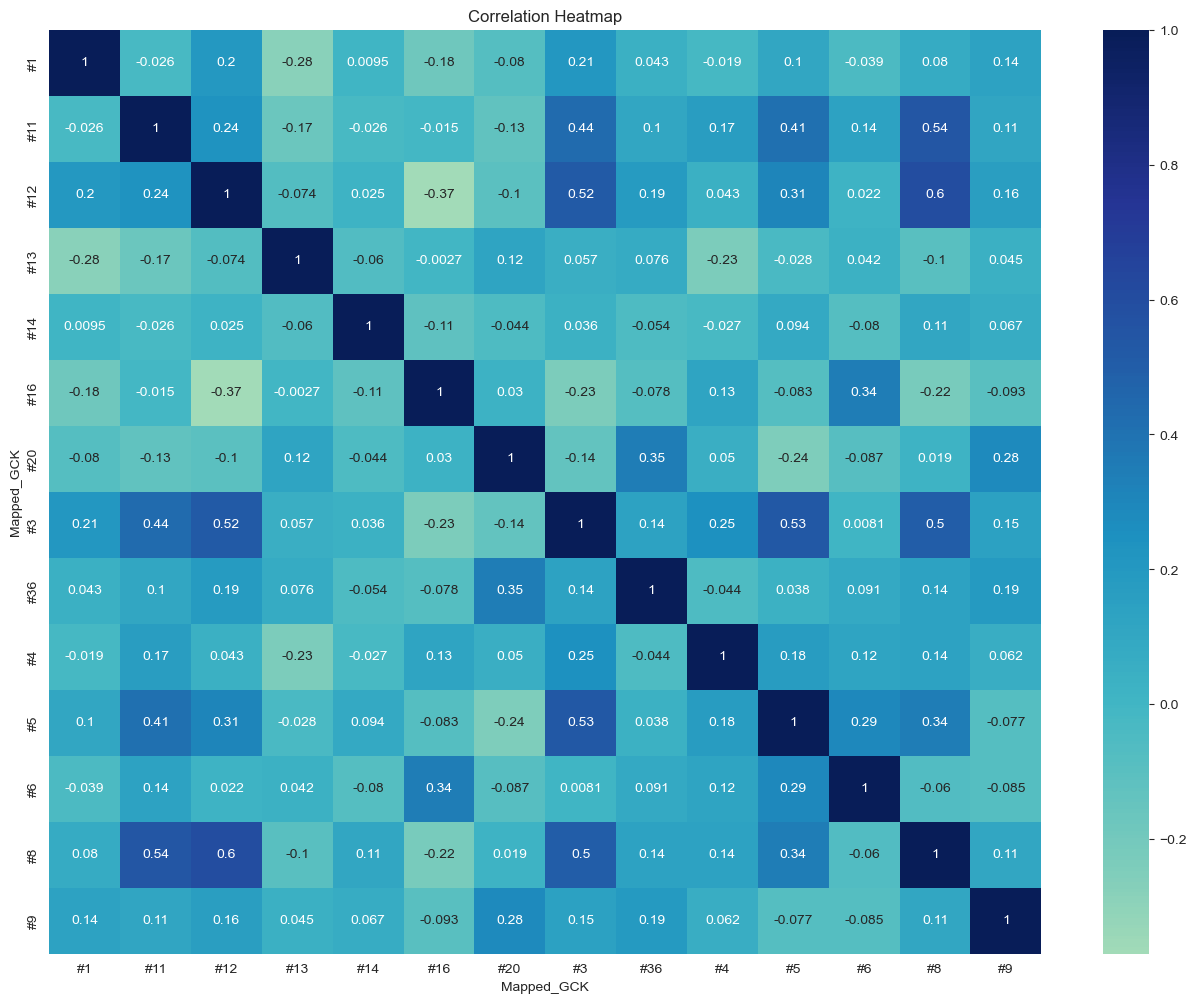

In [101]:
plt.figure(figsize=(16, 12))
corr_matrix = monthly_sales[product_columns].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

No strong linear correlation between products. Product 8 and product 12 seem to be the highest positively correlated products (0.6).

<a class="anchor" id="sub-section-2_1_7"></a>

### 2.1.7. Anomaly Checks

</a>

In [131]:
# STATISTICS
sales_data.describe(include='all')

DATE Mapped_GCK     Sales_EUR     Month  \
count                            9802       9802     9802.0000 9802.0000   
unique                            NaN         14           NaN       NaN   
top                               NaN         #1           NaN       NaN   
freq                              NaN       1179           NaN       NaN   
mean    2020-07-19 17:55:48.785961984        NaN   272785.6867    6.4433   
min               2018-10-01 00:00:00        NaN  -506381.1700    1.0000   
25%               2019-08-30 00:00:00        NaN        0.0000    3.0000   
50%               2020-07-26 12:00:00        NaN        0.0000    6.0000   
75%               2021-06-09 00:00:00        NaN        0.0000   10.0000   
max               2022-04-30 00:00:00        NaN 41127988.0200   12.0000   
std                               NaN        NaN  2230789.1619    3.5736   

            Year  
count  9802.0000  
unique       NaN  
top          NaN  
freq         NaN  
mean   2020.0558  
min    2018.0000  
25%    2019.0000  
50%    2020.0000  
75%    2021.0000  
max    2022.0000  
std       1.0877

From the statistics, we noticed that there are negative sales.

In [136]:
# Check number of negative values per column
print(f"There are {len(sales_data[sales_data['Sales_EUR'] < 0])} of negative sales.")

There are 276 of negative sales.


In [142]:
negative_values = sales_data[sales_data['Sales_EUR'] < 0]

# check number of negatives sales per product
negative_values['Mapped_GCK'].value_counts().sort_values(ascending=False)

Mapped_GCK
#3     56
#1     51
#5     43
#4     40
#8     19
#9     11
#6     10
#12    10
#36     8
#11     7
#14     7
#16     6
#20     5
#13     3
Name: count, dtype: int64

In [141]:
print(f'The product with the highest number of negative sales is product {negative_values["Mapped_GCK"].value_counts().idxmax()}, with {negative_values["Mapped_GCK"].value_counts().max()} negative sales.')
print(f'The product with the lowest number of negative sales is product {negative_values["Mapped_GCK"].value_counts().idxmin()}, with {negative_values["Mapped_GCK"].value_counts().min()} negative sales.')

The product with the highest number of negative sales is product #3, with 56 negative sales.
The product with the lowest number of negative sales is product #13, with 3 negative sales.


In [144]:
# Check for Sales_EUR = 0
print(f"There are {len(sales_data[sales_data['Sales_EUR'] == 0])} of sales equal to 0.")

There are 7134 of sales equal to 0.


In [146]:
zero_sales = sales_data[sales_data['Sales_EUR'] == 0]

# check number of zero sales per product
zero_sales['Mapped_GCK'].value_counts().sort_values(ascending=False)

Mapped_GCK
#1     874
#3     752
#8     720
#5     700
#4     643
#12    628
#6     599
#11    580
#16    444
#13    300
#36    298
#9     228
#20    207
#14    161
Name: count, dtype: int64

<a class="anchor" id="sub-section-2_2"></a>

## 2.2. Market Data

</a>

<a class="anchor" id="sub-section-2_2_1"></a>

### 2.2.1. Initial Analysis

</a>

In [102]:
print(f'Market data shape: {market_data.shape}')
market_data.head()

Market data shape: (219, 48)


Unnamed: 0_level_0  \
  Index 2010=100 (if not otherwise noted)   
                                     date   
0                                  2004m2   
1                                  2004m3   
2                                  2004m4   
3                                  2004m5   
4                                  2004m6   

                                     China  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO156   
0                                  16.9407   
1                                  23.7119   
2                                  24.4352   
3                                  23.7081   
4                                  27.0091   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP156   
0                                 16.9407   
1                                 23.7119   
2                                 24.4352   
3                                 23.7081   
4                                 27.0091   

                                    France  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO250   
0                                 112.0913   
1                                 136.3280   
2                                 117.7918   
3                                 109.0025   
4                                 133.7857   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP250   
0                                 83.4589   
1                                106.1682   
2                                 92.0076   
3                                 85.6965   
4                                106.6415   

                                   Germany  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO276   
0                                  82.6230   
1                                 100.5566   
2                                  89.6532   
3                                  86.8806   
4                                  99.0108   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP276   
0                                 79.4525   
1                                 97.0129   
2                                 84.9324   
3                                 82.3728   
4                                 95.1087   

                                     Italy  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO380   
0                                 124.2896   
1                                 143.4117   
2                                 129.0838   
3                                 135.5904   
4                                 136.4249   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP380   
0                                 86.5605   
1                                106.3445   
2                                 95.5797   
3                                100.0870   
4                                110.8897   

                                     Japan  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO392   
0                                 109.3340   
1                                 140.8846   
2                                 105.8536   
3                                 101.8648   
4                                 120.3329   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP392   
0                                110.4953   
1                                144.6862   
2                                102.6558   
3                                100.3053   
4                                119.6164   

            

***Fixing columnn names***

In [103]:
# Drop the second header row
market_data.columns = market_data.columns.droplevel(1)

# Join the header levels
market_data.columns = ['_'.join([str(level) for level in col_tuple]).strip() for col_tuple in market_data.columns]

market_data.head()

Unnamed: 0_level_0_date  China_MAB_ELE_PRO156  China_MAB_ELE_SHP156  \
0                  2004m2               16.9407               16.9407   
1                  2004m3               23.7119               23.7119   
2                  2004m4               24.4352               24.4352   
3                  2004m5               23.7081               23.7081   
4                  2004m6               27.0091               27.0091   

   France_MAB_ELE_PRO250  France_MAB_ELE_SHP250  Germany_MAB_ELE_PRO276  \
0               112.0913                83.4589                 82.6230   
1               136.3280               106.1682                100.5566   
2               117.7918                92.0076                 89.6532   
3               109.0025                85.6965                 86.8806   
4               133.7857               106.6415                 99.0108   

   Germany_MAB_ELE_SHP276  Italy_MAB_ELE_PRO380  Italy_MAB_ELE_SHP380  \
0                 79.4525              124.2896               86.5605   
1                 97.0129              143.4117              106.3445   
2                 84.9324              129.0838               95.5797   
3                 82.3728              135.5904              100.0870   
4                 95.1087              136.4249              110.8897   

   Japan_MAB_ELE_PRO392  Japan_MAB_ELE_SHP392  Switzerland_MAB_ELE_PRO756  \
0              109.3340              110.4953                     91.2219   
1              140.8846              144.6862                     85.8663   
2              105.8536              102.6558                     85.6225   
3              101.8648              100.3053                     85.3787   
4              120.3329              119.6164                     85.1349   

   Switzerland_MAB_ELE_SHP756  United Kingdom_MAB_ELE_PRO826  \
0                     89.9873                       111.3538   
1                     79.8836                       127.5586   
2                     79.7408                       108.7323   
3                     79.5980                       110.6452   
4                     79.4552                       122.0210   

   United Kingdom_MAB_ELE_SHP826  United States_MAB_ELE_PRO840  \
0                        73.6013                      107.6014   
1                        84.0476                      110.1874   
2                        73.0260                      108.1666   
3                        74.5919                      108.4259   
4                        82.3433                      110.5699   

   United States_MAB_ELE_SHP840  Europe_MAB_ELE_PRO1100  \
0                       79.2402                 97.1229   
1                       98.6190                113.7839   
2                       89.7740                101.7152   
3                       87.4638                101.2757   
4                       97.3645                112.0572   

   Europe_MAB_ELE_SHP1100  Europe_RohiBASEMET1000_org  \
0                 80.0985                     54.0398   
1                 96.0159                     54.6662   
2                 85.1672                     54.8727   
3                 84.4858                     51.2304   
4                 96.9633                     52.8763   

   Europe_RohiENERGY1000_org  Europe_RohiMETMIN1000_org  \
0                    44.1233                    48.7479   
1                    47.5890                    49.2562   
2                    47.7790                    49.4238   
3                    53.5909                    46.4684   
4                    50.7996                    47.8039   

   Europe_RohiNATGAS1000_org  Europe_RohCRUDE_PETRO1000_org  \
0                    87.0770                        39.6395   
1                    87.1927                        42.5920   
2                    91.3799                        42.6506   
3                    99.0445                        47.5171   
4                    98.6363                        44.9676 

In [104]:
# Change first column name to "Date"
market_data.rename(columns={'Unnamed: 0_level_0_date': 'DATE'}, inplace=True)

In [105]:
market_data.columns

Index(['DATE', 'China_MAB_ELE_PRO156', 'China_MAB_ELE_SHP156',
       'France_MAB_ELE_PRO250', 'France_MAB_ELE_SHP250',
       'Germany_MAB_ELE_PRO276', 'Germany_MAB_ELE_SHP276',
       'Italy_MAB_ELE_PRO380', 'Italy_MAB_ELE_SHP380', 'Japan_MAB_ELE_PRO392',
       'Japan_MAB_ELE_SHP392', 'Switzerland_MAB_ELE_PRO756',
       'Switzerland_MAB_ELE_SHP756', 'United Kingdom_MAB_ELE_PRO826',
       'United Kingdom_MAB_ELE_SHP826', 'United States_MAB_ELE_PRO840',
       'United States_MAB_ELE_SHP840', 'Europe_MAB_ELE_PRO1100',
       'Europe_MAB_ELE_SHP1100', 'Europe_RohiBASEMET1000_org',
       'Europe_RohiENERGY1000_org', 'Europe_RohiMETMIN1000_org',
       'Europe_RohiNATGAS1000_org', 'Europe_RohCRUDE_PETRO1000_org',
       'Europe_RohCOPPER1000_org', 'Europe_WKLWEUR840_org',
       'Producer Prices_PRI27840_org', 'Producer Prices_PRI27826_org',
       'Producer Prices_PRI27380_org', 'Producer Prices_PRI27250_org',
       'Producer Prices_PRI27276_org', 'Producer Prices_PRI27156_org',
    

In [106]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATE                            219 non-null    object 
 1   China_MAB_ELE_PRO156            219 non-null    float64
 2   China_MAB_ELE_SHP156            219 non-null    float64
 3   France_MAB_ELE_PRO250           219 non-null    float64
 4   France_MAB_ELE_SHP250           219 non-null    float64
 5   Germany_MAB_ELE_PRO276          219 non-null    float64
 6   Germany_MAB_ELE_SHP276          219 non-null    float64
 7   Italy_MAB_ELE_PRO380            219 non-null    float64
 8   Italy_MAB_ELE_SHP380            219 non-null    float64
 9   Japan_MAB_ELE_PRO392            219 non-null    float64
 10  Japan_MAB_ELE_SHP392            219 non-null    float64
 11  Switzerland_MAB_ELE_PRO756      218 non-null    float64
 12  Switzerland_MAB_ELE_SHP756      218 

In [107]:
# DUPLICATES
market_data[market_data.duplicated() == True]

Empty DataFrame
Columns: [DATE, China_MAB_ELE_PRO156, China_MAB_ELE_SHP156, France_MAB_ELE_PRO250, France_MAB_ELE_SHP250, Germany_MAB_ELE_PRO276, Germany_MAB_ELE_SHP276, Italy_MAB_ELE_PRO380, Italy_MAB_ELE_SHP380, Japan_MAB_ELE_PRO392, Japan_MAB_ELE_SHP392, Switzerland_MAB_ELE_PRO756, Switzerland_MAB_ELE_SHP756, United Kingdom_MAB_ELE_PRO826, United Kingdom_MAB_ELE_SHP826, United States_MAB_ELE_PRO840, United States_MAB_ELE_SHP840, Europe_MAB_ELE_PRO1100, Europe_MAB_ELE_SHP1100, Europe_RohiBASEMET1000_org, Europe_RohiENERGY1000_org, Europe_RohiMETMIN1000_org, Europe_RohiNATGAS1000_org, Europe_RohCRUDE_PETRO1000_org, Europe_RohCOPPER1000_org, Europe_WKLWEUR840_org, Producer Prices_PRI27840_org, Producer Prices_PRI27826_org, Producer Prices_PRI27380_org, Producer Prices_PRI27250_org, Producer Prices_PRI27276_org, Producer Prices_PRI27156_org, production index_PRO28840_org, production index_PRO281000_org, production index_PRO28756_org, production index_PRO28826_org, production index_PRO28380_org, production index_PRO28392_org, production index_PRO28250_org, production index_PRO28276_org, production index_PRO27840_org, production index_PRO271000_org, production index_PRO27756_org, production index_PRO27826_org, production index_PRO27380_org, production index_PRO27392_org, production index_PRO27250_org, production index_PRO27276_org]
Index: []

In [108]:
# MISSING VALUES
missing_values = market_data.isnull().sum()
missing_values[missing_values > 0]

Switzerland_MAB_ELE_PRO756         1
Switzerland_MAB_ELE_SHP756         1
United Kingdom_MAB_ELE_SHP826     18
United States_MAB_ELE_SHP840       1
Producer Prices_PRI27826_org      18
Producer Prices_PRI27250_org      35
Producer Prices_PRI27156_org      23
production index_PRO28756_org      1
production index_PRO271000_org    11
production index_PRO27756_org      1
dtype: int64

In [109]:
# STATISTICS
market_data.describe(include='all')

DATE  China_MAB_ELE_PRO156  China_MAB_ELE_SHP156  \
count       219              219.0000              219.0000   
unique      219                   NaN                   NaN   
top      2004m2                   NaN                   NaN   
freq          1                   NaN                   NaN   
mean        NaN              138.3036              138.3036   
std         NaN               78.8832               78.8832   
min         NaN               16.9407               16.9407   
25%         NaN               68.4777               68.4777   
50%         NaN              133.5077              133.5077   
75%         NaN              198.4739              198.4739   
max         NaN              329.4134              329.4134   

        France_MAB_ELE_PRO250  France_MAB_ELE_SHP250  Germany_MAB_ELE_PRO276  \
count                219.0000               219.0000                219.0000   
unique                    NaN                    NaN                     NaN   
top                       NaN                    NaN                     NaN   
freq                      NaN                    NaN                     NaN   
mean                 104.4319               105.3168                107.4991   
std                   18.9185                12.7622                 11.8619   
min                   50.7567                64.4207                 74.3329   
25%                   93.6135                97.4528                100.5609   
50%                  102.7366               106.0122                108.9923   
75%                  114.0909               115.0305                115.7358   
max                  152.7434               136.8587                130.8700   

        Germany_MAB_ELE_SHP276  Italy_MAB_ELE_PRO380  Italy_MAB_ELE_SHP380  \
count                 219.0000              219.0000              219.0000   
unique                     NaN                   NaN                   NaN   
top                        NaN                   NaN                   NaN   
freq                       NaN                   NaN                   NaN   
mean                  114.8984              105.2284              105.7354   
std                    17.0916               23.5096               19.9482   
min                    71.7872               34.2134               45.1917   
25%                   103.1498               94.3352               95.9858   
50%                   117.4288              105.0885              107.6958   
75%                   127.1122              117.0317              119.8364   
max                   151.2971              153.9408              153.6451   

        Japan_MAB_ELE_PRO392  Japan_MAB_ELE_SHP392  \
count               219.0000              219.0000   
unique                   NaN                   NaN   
top                      NaN                   NaN   
freq                     NaN                   NaN   
mean                111.9481              112.6706   
std                  15.4893               16.8919   
min                  67.5319               64.3723   
25%                 103.7400              103.4532   
50%                 111.6830              112.5973   
75%                 121.4027              121.4981   
max                 153.8987              159.4959   

        Switzerland_MAB_ELE_PRO756  Switzerland_MAB_ELE_SHP756  \
count                     218.0000                    218.0000   
unique                         NaN                         NaN   
top                            NaN                         NaN   
freq                           NaN                         NaN   
mean                       97.8345                     94.7849   
std                         8.2415                      9.1539   
min                        77.8015                     74.6393   
25%                        92.4102                     88.2210   
50%                        97.5731                     94.3768   
75%                       103.8771             

<a class="anchor" id="sub-section-2_2_2"></a>

### 2.2.2. Converting Data Types

</a>

In [110]:
# First change "m" to "-" 
market_data['DATE'] = market_data['DATE'].str.replace('m', '-')

# Convert DATE column to datetime
market_data['DATE'] = pd.to_datetime(market_data['DATE'], format='mixed')

In [111]:
# Verify changes
market_data.head()

DATE  China_MAB_ELE_PRO156  China_MAB_ELE_SHP156  \
0 2004-02-01               16.9407               16.9407   
1 2004-03-01               23.7119               23.7119   
2 2004-04-01               24.4352               24.4352   
3 2004-05-01               23.7081               23.7081   
4 2004-06-01               27.0091               27.0091   

   France_MAB_ELE_PRO250  France_MAB_ELE_SHP250  Germany_MAB_ELE_PRO276  \
0               112.0913                83.4589                 82.6230   
1               136.3280               106.1682                100.5566   
2               117.7918                92.0076                 89.6532   
3               109.0025                85.6965                 86.8806   
4               133.7857               106.6415                 99.0108   

   Germany_MAB_ELE_SHP276  Italy_MAB_ELE_PRO380  Italy_MAB_ELE_SHP380  \
0                 79.4525              124.2896               86.5605   
1                 97.0129              143.4117              106.3445   
2                 84.9324              129.0838               95.5797   
3                 82.3728              135.5904              100.0870   
4                 95.1087              136.4249              110.8897   

   Japan_MAB_ELE_PRO392  Japan_MAB_ELE_SHP392  Switzerland_MAB_ELE_PRO756  \
0              109.3340              110.4953                     91.2219   
1              140.8846              144.6862                     85.8663   
2              105.8536              102.6558                     85.6225   
3              101.8648              100.3053                     85.3787   
4              120.3329              119.6164                     85.1349   

   Switzerland_MAB_ELE_SHP756  United Kingdom_MAB_ELE_PRO826  \
0                     89.9873                       111.3538   
1                     79.8836                       127.5586   
2                     79.7408                       108.7323   
3                     79.5980                       110.6452   
4                     79.4552                       122.0210   

   United Kingdom_MAB_ELE_SHP826  United States_MAB_ELE_PRO840  \
0                        73.6013                      107.6014   
1                        84.0476                      110.1874   
2                        73.0260                      108.1666   
3                        74.5919                      108.4259   
4                        82.3433                      110.5699   

   United States_MAB_ELE_SHP840  Europe_MAB_ELE_PRO1100  \
0                       79.2402                 97.1229   
1                       98.6190                113.7839   
2                       89.7740                101.7152   
3                       87.4638                101.2757   
4                       97.3645                112.0572   

   Europe_MAB_ELE_SHP1100  Europe_RohiBASEMET1000_org  \
0                 80.0985                     54.0398   
1                 96.0159                     54.6662   
2                 85.1672                     54.8727   
3                 84.4858                     51.2304   
4                 96.9633                     52.8763   

   Europe_RohiENERGY1000_org  Europe_RohiMETMIN1000_org  \
0                    44.1233                    48.7479   
1                    47.5890                    49.2562   
2                    47.7790                    49.4238   
3                    53.5909                    46.4684   
4                    50.7996                    47.8039   

   Europe_RohiNATGAS1000_org  Europe_RohCRUDE_PETRO1000_org  \
0                    87.0770                        39.6395   
1                    87.1927                        42.5920   
2                    91.3799                        42.6506   
3                    99.0445                        47.5171   
4                    98.6363                        44.9676   

   Europe_RohCOPPER1000_org  Europe_WKLWEUR840_org  \
0                   36.623

By changing data types, DATE now includes the day (i.e. the first of every month), however, this will not be taken into account. Certain algorithms do not take period data type (yyyy-mm), so we will ignore the 1st of the month.

<a class="anchor" id="sub-section-2_2_3"></a>

### 2.2.3. Exploratory Data Analysis

</a>

I WILL ADD ANALYSIS LATER

In [128]:
production_features = ["China_MAB_ELE_PRO156", "France_MAB_ELE_PRO250", "Germany_MAB_ELE_PRO276", "Italy_MAB_ELE_PRO380", 
                       "Japan_MAB_ELE_PRO392", "Switzerland_MAB_ELE_PRO756", "United Kingdom_MAB_ELE_PRO826", 
                       "United States_MAB_ELE_PRO840", "Europe_MAB_ELE_PRO1100"]

shipment_features = ["China_MAB_ELE_SHP156", "France_MAB_ELE_SHP250", "Germany_MAB_ELE_SHP276", "Italy_MAB_ELE_SHP380", 
                     "Japan_MAB_ELE_SHP392", "Switzerland_MAB_ELE_SHP756", "United Kingdom_MAB_ELE_SHP826", 
                     "United States_MAB_ELE_SHP840", "Europe_MAB_ELE_SHP1100"]

commodity_features = ['Europe_RohiBASEMET1000_org', 'Europe_RohiENERGY1000_org', 'Europe_RohiMETMIN1000_org', 
                      'Europe_RohiNATGAS1000_org', 'Europe_RohCRUDE_PETRO1000_org', 'Europe_RohCOPPER1000_org', 
                      'Europe_WKLWEUR840_org']

producer_price_features = ['Producer Prices_PRI27840_org', 'Producer Prices_PRI27826_org', 'Producer Prices_PRI27380_org', 
                           'Producer Prices_PRI27250_org', 'Producer Prices_PRI27276_org', 'Producer Prices_PRI27156_org',]

production_index_features = ['production index_PRO28840_org', 'production index_PRO281000_org', 
                             'production index_PRO28756_org', 'production index_PRO28826_org',
                             'production index_PRO28380_org', 'production index_PRO28392_org',
                             'production index_PRO28250_org', 'production index_PRO28276_org',
                             'production index_PRO27840_org', 'production index_PRO271000_org',
                             'production index_PRO27756_org', 'production index_PRO27826_org',
                             'production index_PRO27380_org', 'production index_PRO27392_org',
                             'production index_PRO27250_org', 'production index_PRO27276_org']

all_features = production_features + shipment_features + commodity_features + producer_price_features + production_index_features

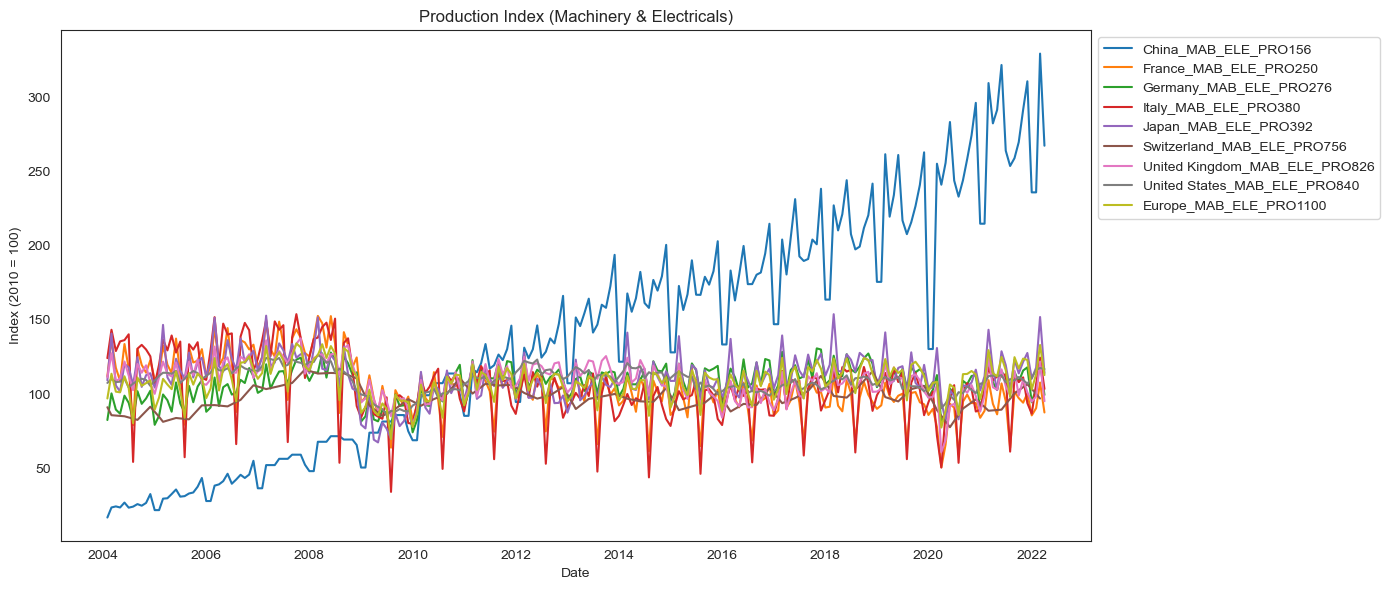

In [118]:
plt.figure(figsize=(14, 6))
for col in production_features:
    plt.plot(market_data["DATE"], market_data[col], label=col)

plt.title("Production Index (Machinery & Electricals)")
plt.xlabel("Date")
plt.ylabel("Index (2010 = 100)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

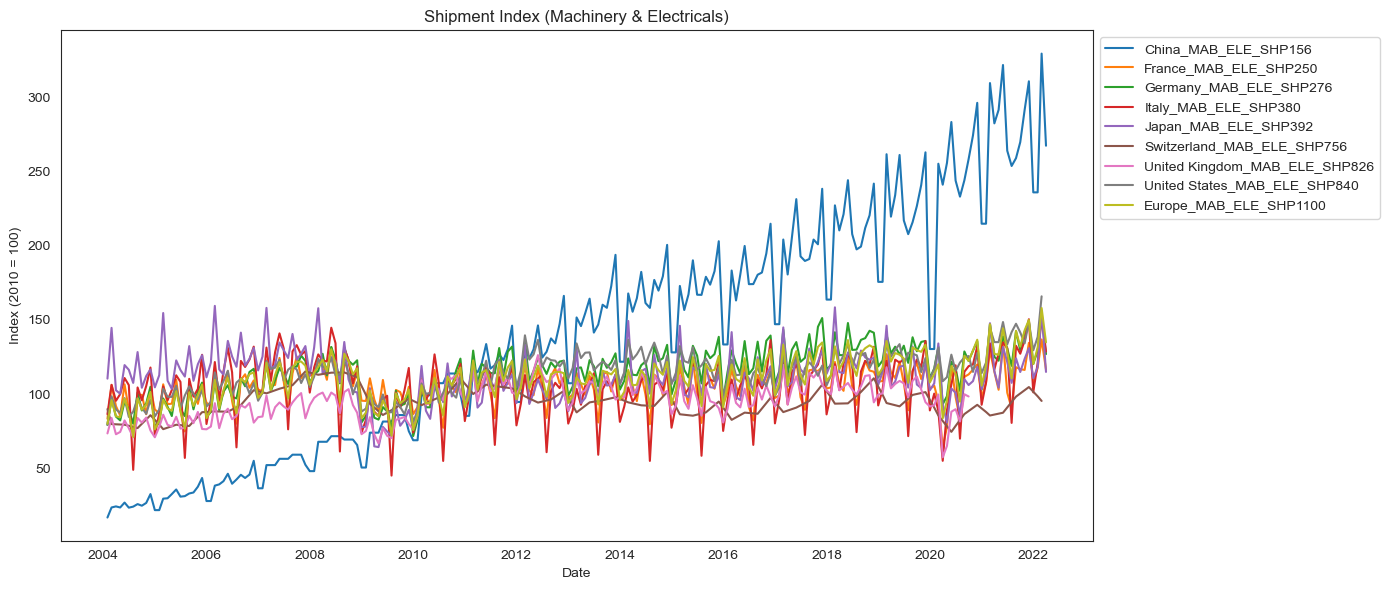

In [122]:
plt.figure(figsize=(14, 6))
for col in shipment_features:
    plt.plot(market_data["DATE"], market_data[col], label=col)

plt.title("Shipment Index (Machinery & Electricals)")
plt.xlabel("Date")
plt.ylabel("Index (2010 = 100)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

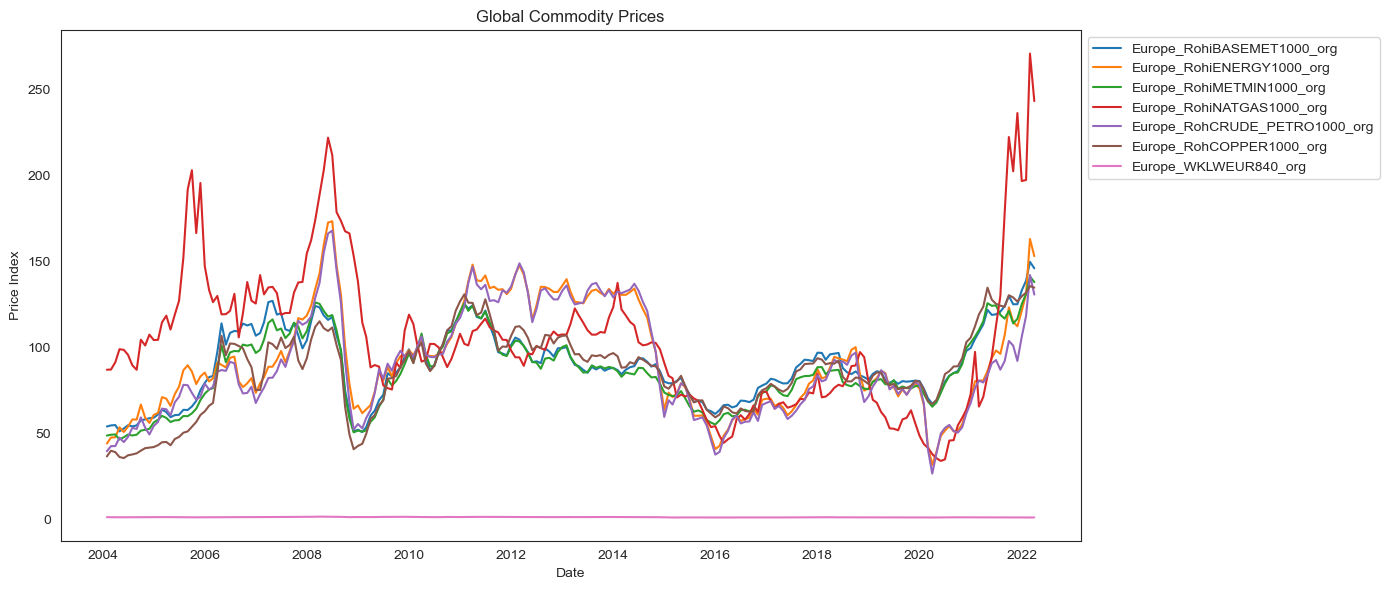

In [124]:
plt.figure(figsize=(14, 6))
for col in commodity_features:
    plt.plot(market_data["DATE"], market_data[col], label=col)

plt.title("Global Commodity Prices")
plt.xlabel("Date")
plt.ylabel("Price Index")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

***Correlation between features***

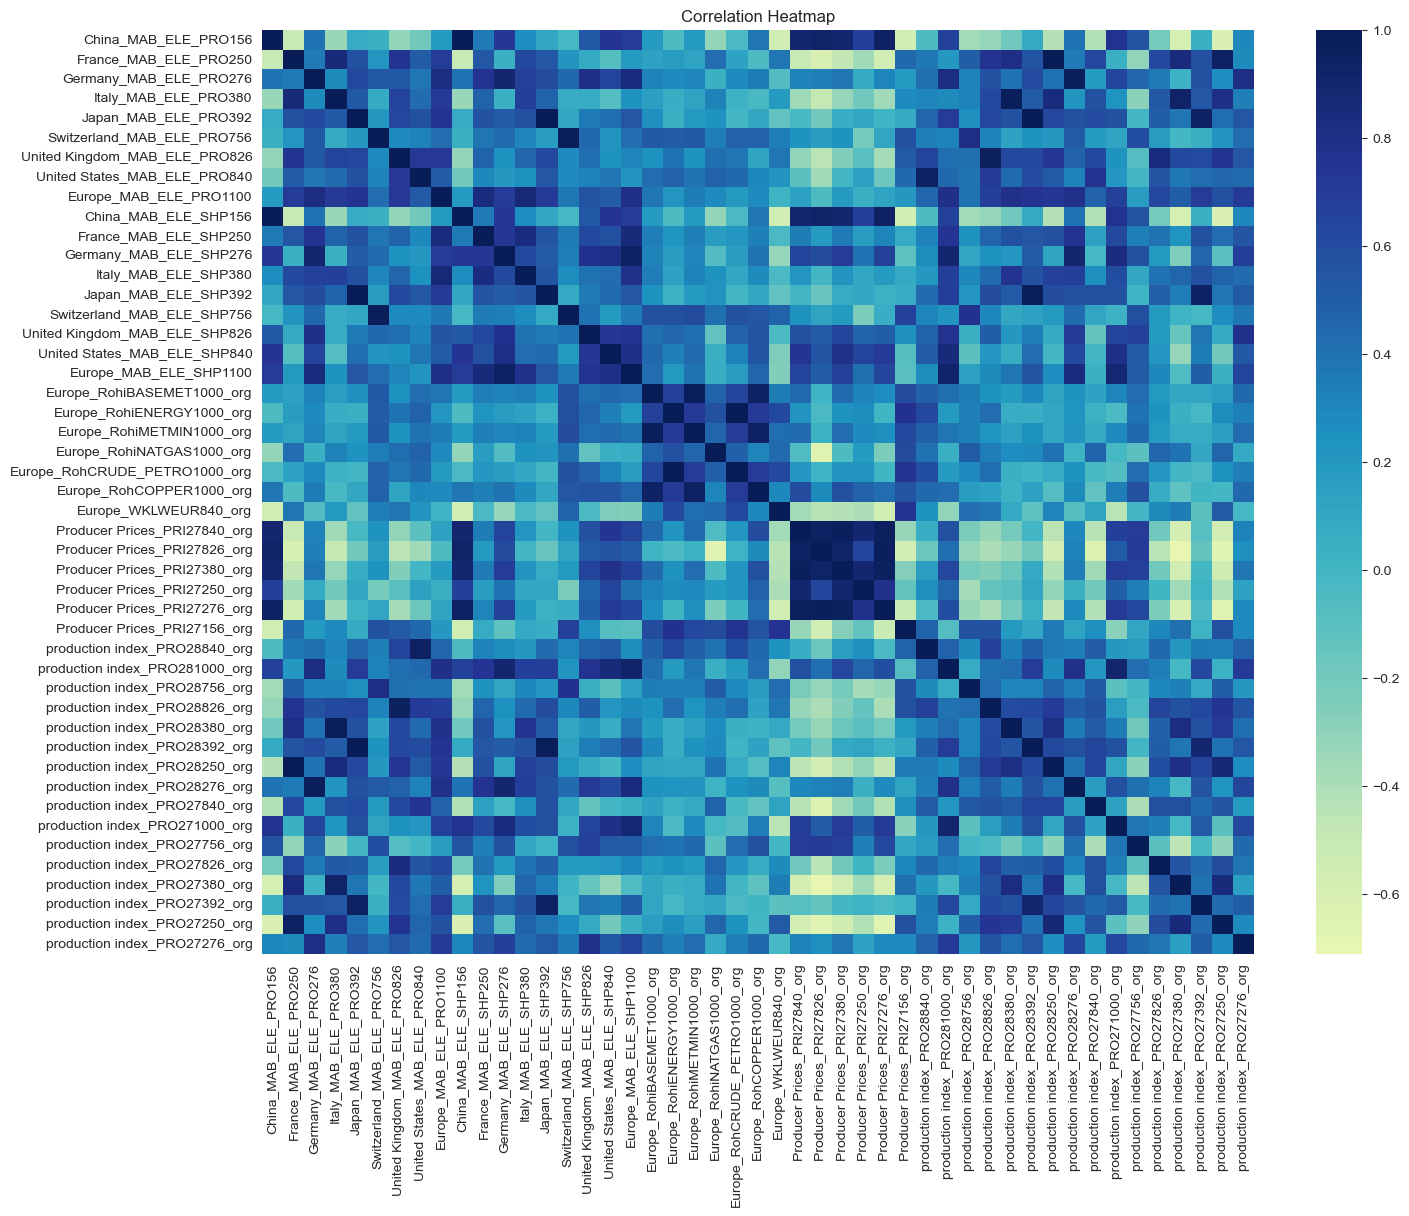

In [129]:
plt.figure(figsize=(16, 12))
corr_matrix = market_data[all_features].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

Filter out correlations above or equal the threshold of 0.85 and ony keep one side for better interpretability.

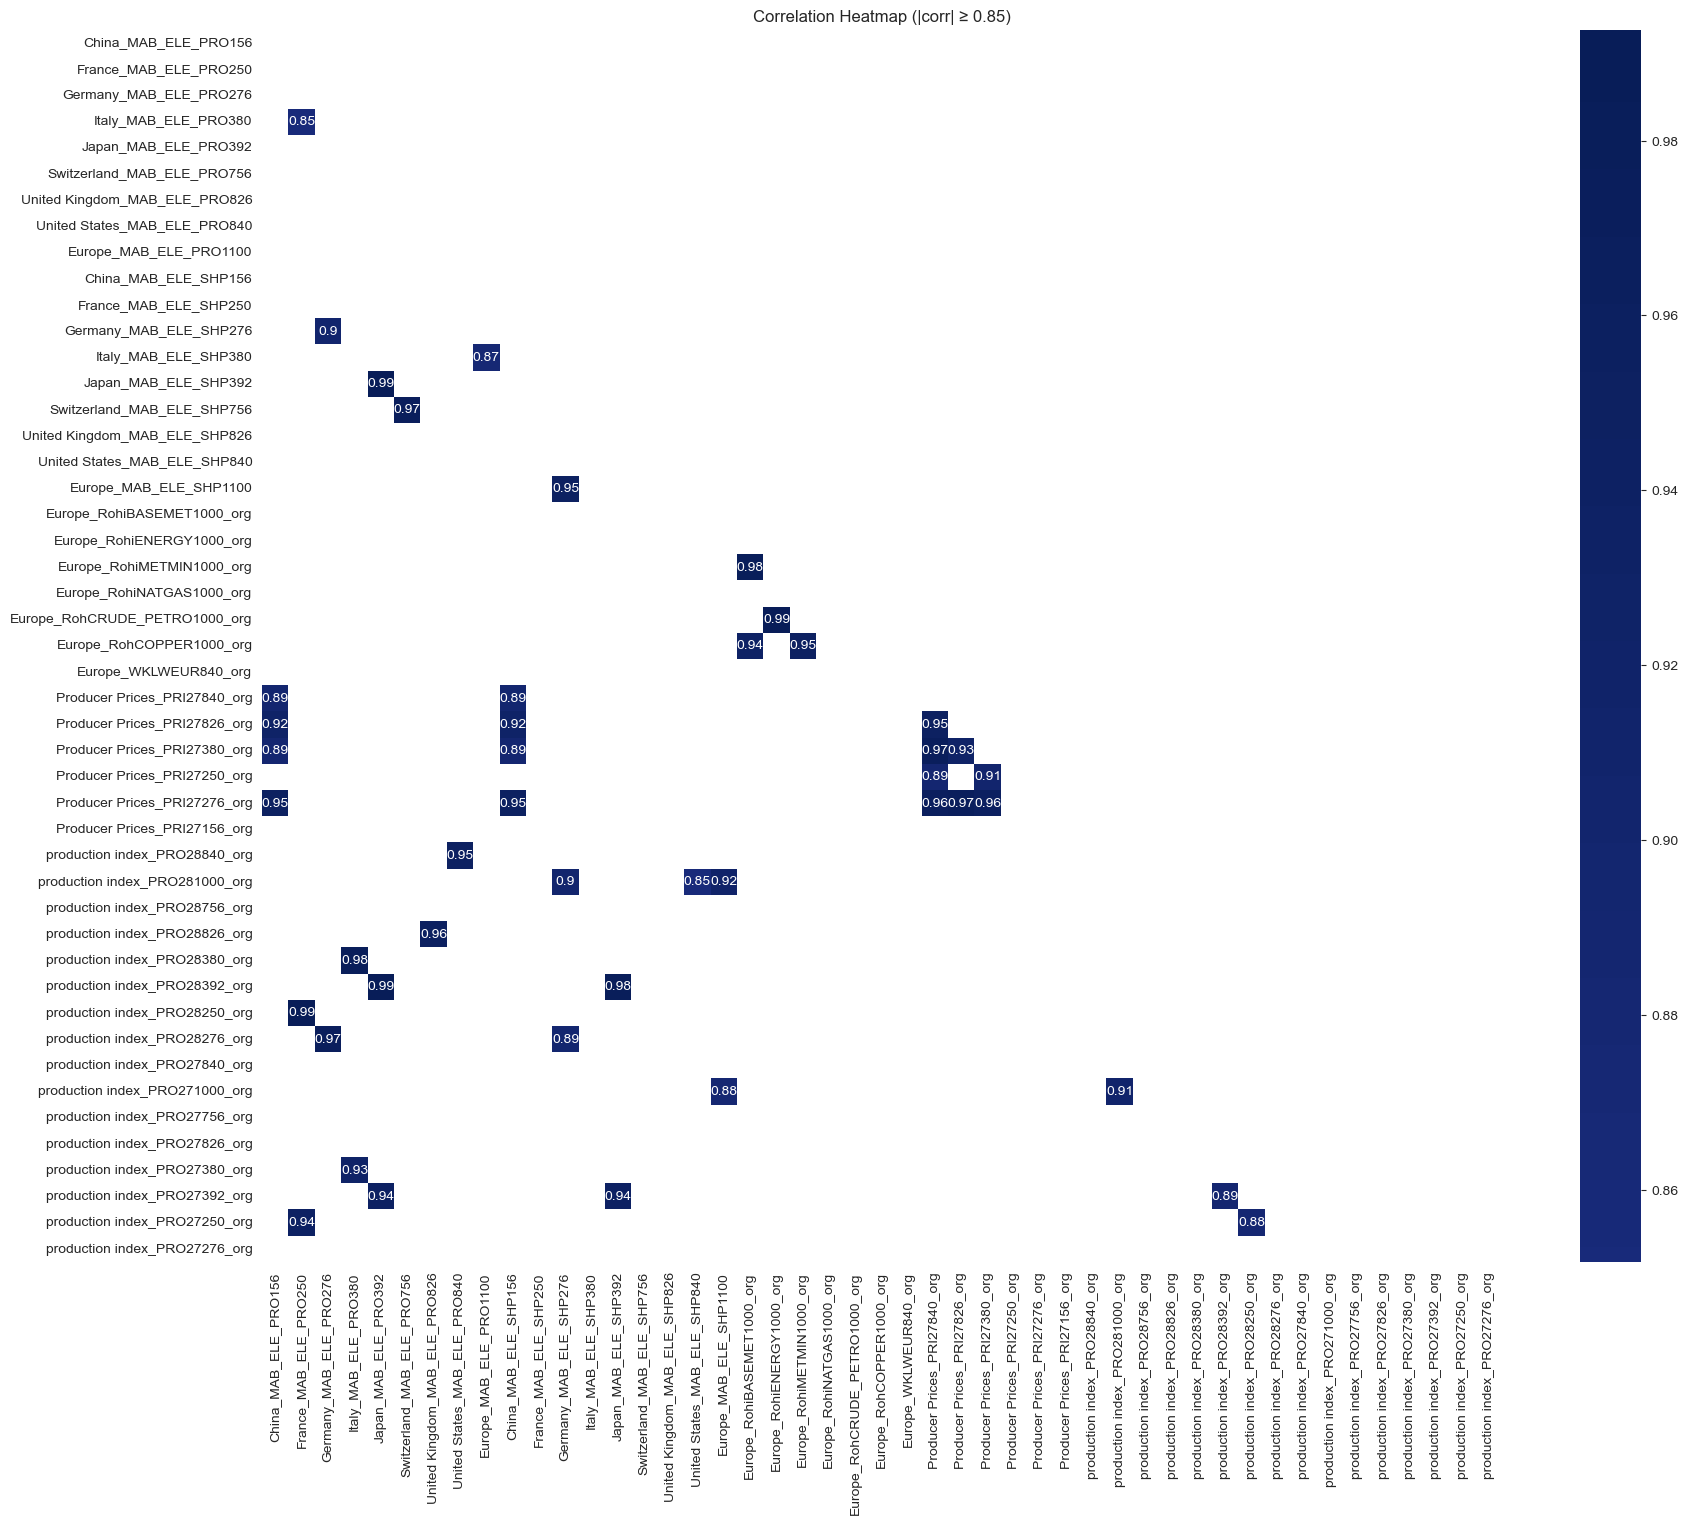

In [130]:
threshold = 0.85
filtered_corr = corr_matrix.where((corr_matrix.abs() >= threshold) & (corr_matrix.abs() != 1.0))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(filtered_corr, mask=mask, cmap='YlGnBu', center=0, annot=True)
plt.title(f"Correlation Heatmap (|corr| ≥ {threshold})")
plt.show()

<a class="anchor" id="sub-section-2_2_4"></a>

### 2.2.4. Splitting into Dataframes

</a>

***Shipment & production***

In [52]:
# Slice dataframe and keep the first 20 columns
ship_prod_indexes = market_data.iloc[:, :18]
print(f'Shipment & production dataframe shape: {ship_prod_indexes.shape}')
ship_prod_indexes.columns

Shipment & production dataframe: (219, 18)


Index(['DATE', 'China_MAB_ELE_PRO156', 'China_MAB_ELE_SHP156',
       'France_MAB_ELE_PRO250', 'France_MAB_ELE_SHP250',
       'Germany_MAB_ELE_PRO276', 'Germany_MAB_ELE_SHP276',
       'Italy_MAB_ELE_PRO380', 'Italy_MAB_ELE_SHP380', 'Japan_MAB_ELE_PRO392',
       'Japan_MAB_ELE_SHP392', 'Switzerland_MAB_ELE_PRO756',
       'Switzerland_MAB_ELE_SHP756', 'United Kingdom_MAB_ELE_PRO826',
       'United Kingdom_MAB_ELE_SHP826', 'United States_MAB_ELE_PRO840',
       'United States_MAB_ELE_SHP840', 'Europe_MAB_ELE_PRO1100'],
      dtype='object')

***Material price***

In [53]:
# Slice the dataframe and keep columns 18 to 24
materials_price = market_data.iloc[:, 18:25]
print(f'Materials price dataframe shape: {materials_price.shape}')
materials_price.columns

Materials price dataframe: (219, 7)


Index(['Europe_MAB_ELE_SHP1100', 'Europe_RohiBASEMET1000_org',
       'Europe_RohiENERGY1000_org', 'Europe_RohiMETMIN1000_org',
       'Europe_RohiNATGAS1000_org', 'Europe_RohCRUDE_PETRO1000_org',
       'Europe_RohCOPPER1000_org'],
      dtype='object')

***Producer price***

In [54]:
# Slice the dataframe and keep columns from 25 to 30
producer_price = market_data.iloc[:, 25:31]
print(f'Producer price dataframe shape: {producer_price.shape}')
producer_price.columns

Producer price dataframe: (219, 6)


Index(['Europe_WKLWEUR840_org', 'Producer Prices_PRI27840_org',
       'Producer Prices_PRI27826_org', 'Producer Prices_PRI27380_org',
       'Producer Prices_PRI27250_org', 'Producer Prices_PRI27276_org'],
      dtype='object')

***Production index***

In [55]:
# Slice the dataframe and keep columns from 31 to the end
production_index = market_data.iloc[:, 31:]
print(f'Production index dataframe shape: {production_index.shape}')
production_index.columns

Production index dataframe shape: (219, 17)


Index(['Producer Prices_PRI27156_org', 'production index_PRO28840_org',
       'production index_PRO281000_org', 'production index_PRO28756_org',
       'production index_PRO28826_org', 'production index_PRO28380_org',
       'production index_PRO28392_org', 'production index_PRO28250_org',
       'production index_PRO28276_org', 'production index_PRO27840_org',
       'production index_PRO271000_org', 'production index_PRO27756_org',
       'production index_PRO27826_org', 'production index_PRO27380_org',
       'production index_PRO27392_org', 'production index_PRO27250_org',
       'production index_PRO27276_org'],
      dtype='object')

<a class="anchor" id="chapter2"></a>

# 3. Data Preprocessing

</a>